# Week 6. Optimization. Programming Task

### For grading

In [5]:
#DO NOT CHANGE
import grading
import grading_utils

Let us consider the **House Pricing** dataset, where you have a lot of information about the houses being sold and you aim to produce the price of the house. 

**To submit your answers you will need to copy your token from next task ‘Programming: Final project’.**

**NOTE: you should write an optimal code: try avoiding cycles and use `numpy` instead! Optimality of your code will be graded out of 2 points**

Firstly, let us import basic libraries (`numpy` ([docs](https://numpy.org/)) for matrix operations and `pandas` ([docs](https://pandas.pydata.org/)) for convinient dataset workaround):

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Task 1. Reading 

In [9]:
datX = np.load('x_train.npy')
datY = np.log(np.load('y_train.npy'))
datX = pd.DataFrame(datX, columns=datX.dtype.names)
datX

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2014-09-16,5.0,3.25,3710,34200,2.0,False,3,8,2510,1200,1986,0,98074,47.610100,-122.046997
1,2014-11-18,3.0,1.75,2820,8879,1.0,False,5,7,1540,1280,1920,1957,98146,47.509399,-122.375999
2,2014-11-10,3.0,1.00,1240,239144,1.0,False,3,6,1240,0,1921,1992,98038,47.430302,-122.045998
3,2015-04-16,4.0,2.50,2670,8279,2.0,False,3,7,2670,0,1999,0,98148,47.429199,-122.328003
4,2014-07-23,3.0,2.25,2700,4025,2.0,False,4,8,1760,940,1907,0,98122,47.607399,-122.293999
5,2015-04-24,4.0,2.25,2860,11545,1.0,False,4,8,1430,1430,1966,0,98005,47.588001,-122.167999
6,2014-11-20,4.0,3.00,2090,7500,1.0,False,3,7,1370,720,1986,0,98056,47.488800,-122.181999
7,2015-04-23,4.0,3.75,3450,4940,2.0,False,3,10,2570,880,2006,0,98103,47.692001,-122.337997
8,2014-11-19,3.0,3.00,3490,4500,2.5,False,3,9,3170,320,1924,0,98102,47.639400,-122.320999
9,2014-09-15,3.0,1.75,1300,2446,1.0,False,3,8,880,420,1961,0,98122,47.607101,-122.285004


Okay, we manage to load the data (you can read more about the `load` [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html). But it is not a necessity). We are going to use linear models to work with it, but firstly we need to come up with idea what features should we include in the model at all (which feature the price is lineary dependent on):

Do not forget to install seaborn. You can do that by running `pip install seaborn` in the command line locally, or simply by running the next sell:

In [10]:
!pip install seaborn

You are using pip version 9.0.3, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In order to do it let us plot every feature vs the price. Firstly, we import nice plotting modules:

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

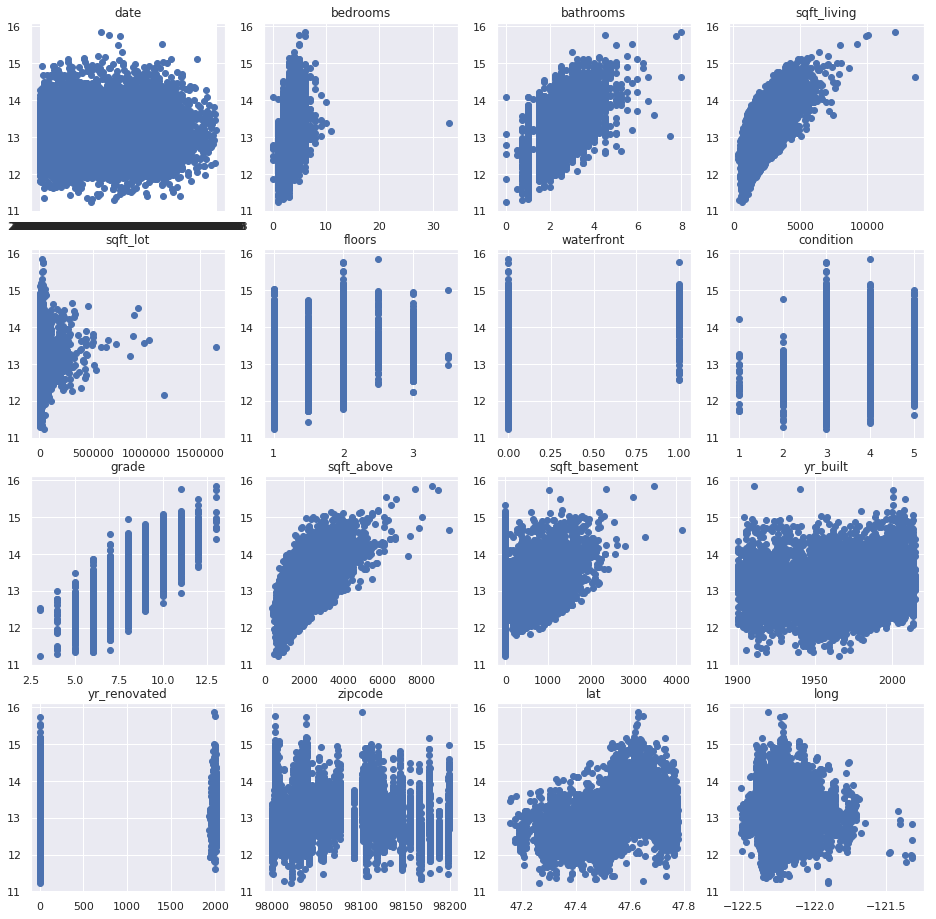

In [8]:
f, ax=plt.subplots(4, 4, figsize=(16,16))

for i, name in enumerate(datX.columns):
    ax[i//4][i%4].scatter(datX[name], datY)
    ax[i//4][i%4].set_title(name)

Let us say, that we choose to work the following set of features:
+ `bedrooms`
+ `bathrooms`
+ `sqft_living`
+ `floors`
+ `condition`
+ `grade`
+ `sqft_above`
+ `sqft_basement`
+ `long`
+ `lat`

Clear the dataset from all the other features and create:
1. matrix $X$, all elements should be real numbers
2. number $N$ -- number of considered houses
3. number $m$ -- number of new features

**Hint**: it is easier to clean columns from dataset (you should look [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for insipration) and the get a matrix with `.values`

In [11]:
# selected columns
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 
            'grade', 'sqft_above', 'sqft_basement', 'long', 'lat']

data = datX[columns]

# new selected data
X = data.values

# N - number of rows, m - number of columns
N, m = X.shape[0], X.shape[1]

In [12]:
N, m

(15000, 10)

In [13]:
data

,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,long,lat
0,5.0,3.25,3710,2.0,3,8,2510,1200,-122.046997,47.610100
1,3.0,1.75,2820,1.0,5,7,1540,1280,-122.375999,47.509399
2,3.0,1.00,1240,1.0,3,6,1240,0,-122.045998,47.430302
3,4.0,2.50,2670,2.0,3,7,2670,0,-122.328003,47.429199
4,3.0,2.25,2700,2.0,4,8,1760,940,-122.293999,47.607399
5,4.0,2.25,2860,1.0,4,8,1430,1430,-122.167999,47.588001
6,4.0,3.00,2090,1.0,3,7,1370,720,-122.181999,47.488800
7,4.0,3.75,3450,2.0,3,10,2570,880,-122.337997,47.692001
8,3.0,3.00,3490,2.5,3,9,3170,320,-122.320999,47.639400
9,3.0,1.75,1300,1.0,3,8,880,420,-122.285004,47.607101


Run the following cells to automatically check results of your code:

In [14]:
X

array([[  5.00000000e+00,   3.25000000e+00,   3.71000000e+03, ...,
          1.20000000e+03,  -1.22046997e+02,   4.76100998e+01],
       [  3.00000000e+00,   1.75000000e+00,   2.82000000e+03, ...,
          1.28000000e+03,  -1.22375999e+02,   4.75093994e+01],
       [  3.00000000e+00,   1.00000000e+00,   1.24000000e+03, ...,
          0.00000000e+00,  -1.22045998e+02,   4.74303017e+01],
       ..., 
       [  2.00000000e+00,   1.00000000e+00,   6.40000000e+02, ...,
          0.00000000e+00,  -1.22359001e+02,   4.75149994e+01],
       [  3.00000000e+00,   1.00000000e+00,   1.63000000e+03, ...,
          0.00000000e+00,  -1.22317001e+02,   4.77547989e+01],
       [  2.00000000e+00,   1.00000000e+00,   7.20000000e+02, ...,
          0.00000000e+00,  -1.22403999e+02,   4.76534004e+01]])

Consider that we are interested in the loss of the model we discussed in the video:

+ Assume we have input data that is denoted as $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_N$
+ House prices for this input data are known $y_1, y_2, \ldots, y_N$

We propose a **simple linear model** for this task:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

As a loss function we will use the mean squared error (**MSE**):

$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2
$$

### Task 2. Compute analytically the $Loss(\vec{w})$ function
Please, keep the signature of the function and enter the code only under `your code goes here`.

**Attention**: you need to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations. **Your score will be decreased if you use cycles**!

_Hint_: to get nice $w_0$ coefficient it is convinient to add to the `X` matrix the column of 1 with `np.concatenate` [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html)

In [17]:
def loss(w, X, y):
        
    # to get w_0 add to the X matrix the column of 1
    # N = X.shape[0]
    
    ones = np.ones([N, 1])
    X = np.concatenate([ones, X], axis=1)
    
    # y predicted values
    y_predicted = np.dot(X, w)
    
    # the mean squared error (MSE)
    lossValue = np.mean(np.square(np.subtract(y, y_predicted)))
          
    return lossValue

Run the following cells to automatically check results of your code.

### Task 3. Compute analyticaly the gradient of the $Loss(\vec{w})$ (1 point)
Please, enter your answer in the cell below (it should be a `markdown` cell). You can initially specify each partial derivative $\frac{\partial Loss}{\partial w_i}$, but **your final answer must consists of $\nabla Loss$ altogether using matrix operations**.

Let's specify each partial derivative $\frac{\partial Loss}{\partial w_i}$.

We have $Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2$ or $Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N (y_i-x_iw_i-w_0)^2$.

Then $\frac{\partial Loss}{\partial w_i} = \frac{1}{N}\sum_{i=1}^N (2(y_i-x_iw_i-w_0)(-x_i) = \frac{2}{N}\sum_{i=1}^N x_i(x_iw_i+w_0 - y_i) = \frac{2}{N}\sum_{i=1}^N x_i(\hat{y}_i - y_i)$.

We take into account that X needs to be transposed for calculations, then **using matrix operations the formula is**

$$\nabla Loss = \frac{2}{N}X^T(\hat{Y} - Y)$$

### Task 4. Write a function to compute the gradient of the Loss function in the given point
Please, keep the signature of the function and enter the code only under `your code goes here`. 

**Attention**: you need to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations. **Your score will be decreased if you use cycles**!


In [20]:
def grad(w_k, X, y):
    
    # to get w_0 add to the X matrix the column of 1
    # N = X.shape[0]
    
    ones = np.ones([N, 1])
    X = np.concatenate([ones, X], axis=1)
    
    # y predicted values
    y_predicted = np.dot(X, w_k)
    
    # the gradient of the Loss(w) using the formula above
    lossGradient = (2 / N) * np.dot(np.transpose(X), np.subtract(y_predicted, y))
     
    return lossGradient

Run the following cells to automatically check your function. 

### Task 5. Write gradient descent (2 points)
How it is time to formulate the gradient descent! As you remeember, the idea here is that:
$$
\vec{w}^{k+1}=\vec{w}^{k}-\alpha_k\cdot \nabla Loss(\vec{w}^{k})
$$
We propose that you use constant $\alpha_k=\alpha$. Assume that the method should stop in two cases:
+ if the number of iterations is to high (`maxiter`)
+ if the length of the gradient is low enough (<`eps`) to call an extremum

Please, keep the signature of the function and enter the code only under `your code goes here`. 

In [23]:
def gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2):
    losses = []
    weights = [w_init]
    
    curiter = 0
    w_k = weights[-1]
    
    # stop if the number of iterations is bigger than maxiter
    while curiter < maxiter: # not <= or number of numbers of iterations is 501
       
        # the gradient of the Loss function in the given point
        gradient = grad(w_k, X, y)  
        # the length of the vector gradient
        length = np.linalg.norm(gradient)
        
        # stop if the length pass for eps condition
        if length <= eps:
            break
            
        # weight in the next point
        w_k = w_k - alpha * gradient
        
        weights.append(w_k)
        
        # the loss function in the next point
        loss_function_value = loss(w_k, X, y)     
        losses.append(loss_function_value)
        
        # increase the iteration counter by one
        curiter += 1
        
    return weights, losses

Experiment with several alphas and several intial values of weights. To illustrate, provide graphs for the Loss function over iterations in each case (and, optionally, the distance between weigths from one iteration to the next):

(we provided all key plotting commands for you, but you can always look into [this tutorial](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py))

**Note:** You need to provide at least **two** experiments with **different values of $\alpha$** (**1 point**). Preferably, there should be at least one convergent.

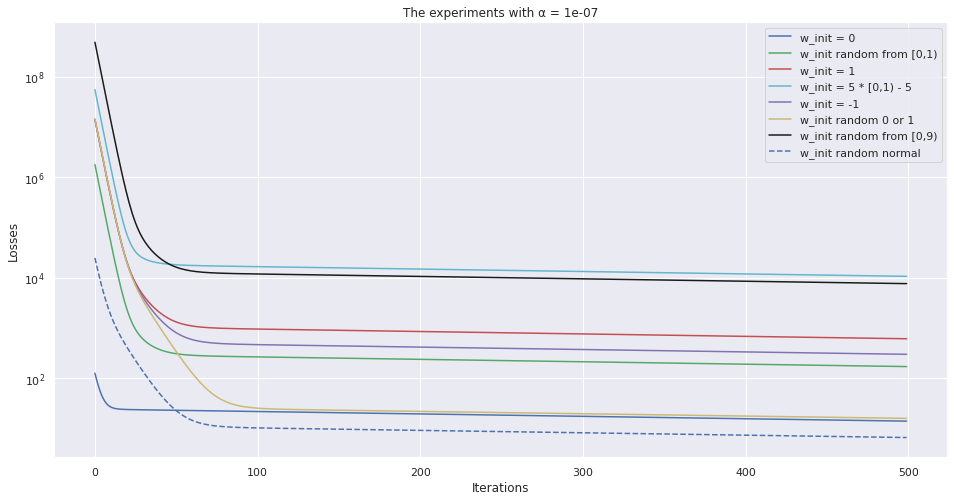

In [199]:
# The experimet with α = 10**(-7) and w_init.
# random 1

# m = X.shape[1]

y = datY

w_init0 = np.ones(m+1)*0
w_init1 = np.random.random_sample((m+1,))
w_init2 = np.ones(m+1)*1
w_init3 = 5 * np.random.random_sample((m+1,)) - 5
w_init4 = np.ones(m+1)*(-1)
w_init5 = np.random.randint(2, size=m+1)
w_init6 = np.random.randint(10, size=m+1)
w_init7 = np.random.normal(size=(m+1), scale=0.1)

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

alpha = 10**(-7)
weights0, losses0 = gradDescent(w_init0, alpha, X, y, maxiter=500, eps=1e-2)
weights1, losses1 = gradDescent(w_init1, alpha, X, y, maxiter=500, eps=1e-2)
weights2, losses2 = gradDescent(w_init2, alpha, X, y, maxiter=500, eps=1e-2)
weights3, losses3 = gradDescent(w_init3, alpha, X, y, maxiter=500, eps=1e-2)
weights4, losses4 = gradDescent(w_init4, alpha, X, y, maxiter=500, eps=1e-2)
weights5, losses5 = gradDescent(w_init5, alpha, X, y, maxiter=500, eps=1e-2)
weights6, losses6 = gradDescent(w_init6, alpha, X, y, maxiter=500, eps=1e-2)
weights7, losses7 = gradDescent(w_init7, alpha, X, y, maxiter=500, eps=1e-2)

ax.plot(losses0,'b-', label='w_init = 0')
ax.plot(losses1,'g-', label='w_init random from [0,1)')
ax.plot(losses2,'r-', label='w_init = 1')
ax.plot(losses3,'c-', label='w_init = 5 * [0,1) - 5')
ax.plot(losses4,'m-', label='w_init = -1')
ax.plot(losses5,'y-', label='w_init random 0 or 1')
ax.plot(losses6,'k-', label='w_init random from [0,9)')
ax.plot(losses7,'b--', label='w_init random normal')

plt.title('The experiments with α = {}'.format(alpha))
plt.ylabel('Losses')   
plt.xlabel('Iterations')

ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

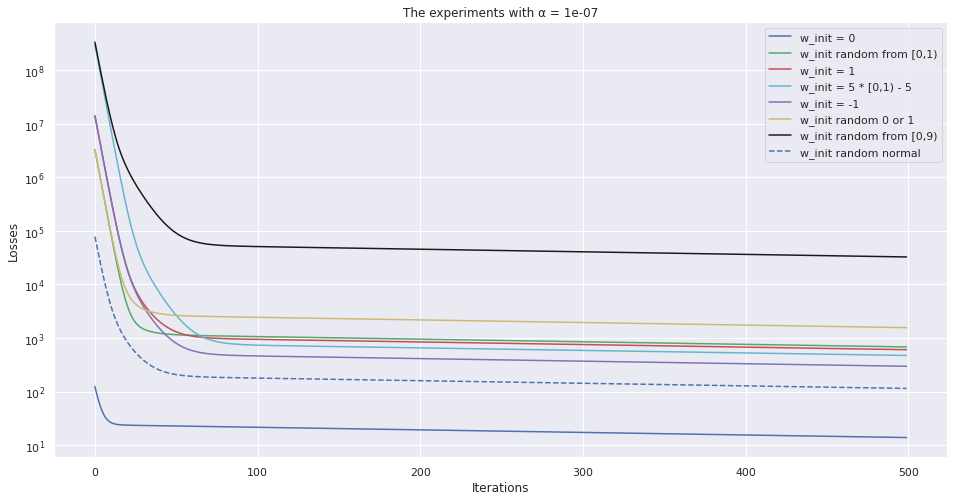

In [200]:
# The experimet with α = 10**(-7) and w_init.
# random 2

y = datY

w_init0 = np.ones(m+1)*0
w_init1 = np.random.random_sample((m+1,))
w_init2 = np.ones(m+1)*1
w_init3 = 5 * np.random.random_sample((m+1,)) - 5
w_init4 = np.ones(m+1)*(-1)
w_init5 = np.random.randint(2, size=m+1)
w_init6 = np.random.randint(10, size=m+1)
w_init7 = np.random.normal(size=(m+1), scale=0.1)

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

alpha = 10**(-7)
weights0, losses0 = gradDescent(w_init0, alpha, X, y, maxiter=500, eps=1e-2)
weights1, losses1 = gradDescent(w_init1, alpha, X, y, maxiter=500, eps=1e-2)
weights2, losses2 = gradDescent(w_init2, alpha, X, y, maxiter=500, eps=1e-2)
weights3, losses3 = gradDescent(w_init3, alpha, X, y, maxiter=500, eps=1e-2)
weights4, losses4 = gradDescent(w_init4, alpha, X, y, maxiter=500, eps=1e-2)
weights5, losses5 = gradDescent(w_init5, alpha, X, y, maxiter=500, eps=1e-2)
weights6, losses6 = gradDescent(w_init6, alpha, X, y, maxiter=500, eps=1e-2)
weights7, losses7 = gradDescent(w_init7, alpha, X, y, maxiter=500, eps=1e-2)

ax.plot(losses0,'b-', label='w_init = 0')
ax.plot(losses1,'g-', label='w_init random from [0,1)')
ax.plot(losses2,'r-', label='w_init = 1')
ax.plot(losses3,'c-', label='w_init = 5 * [0,1) - 5')
ax.plot(losses4,'m-', label='w_init = -1')
ax.plot(losses5,'y-', label='w_init random 0 or 1')
ax.plot(losses6,'k-', label='w_init random from [0,9)')
ax.plot(losses7,'b--', label='w_init random normal')

plt.title('The experiments with α = {}'.format(alpha))
plt.ylabel('Losses')   
plt.xlabel('Iterations')

ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

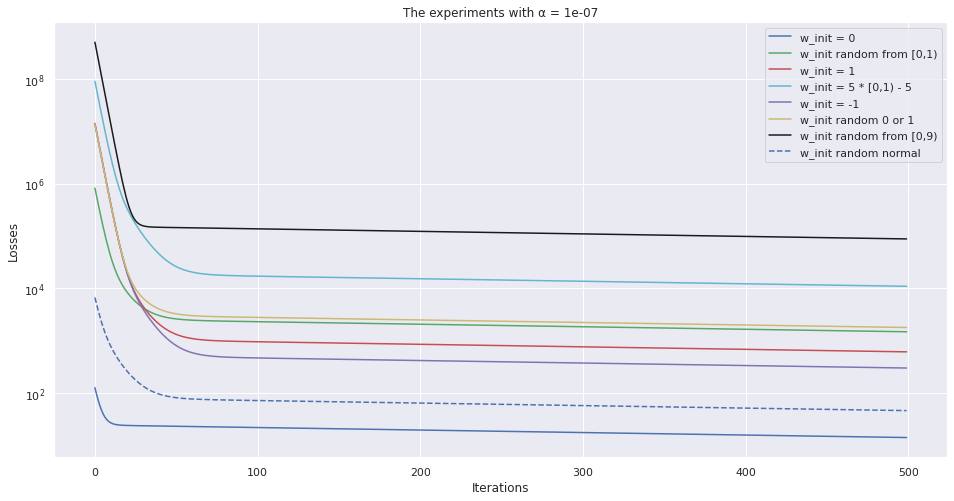

In [201]:
# The experimet with α = 10**(-7) and w_init.
# random 3

y = datY

w_init0 = np.ones(m+1)*0
w_init1 = np.random.random_sample((m+1,))
w_init2 = np.ones(m+1)*1
w_init3 = 5 * np.random.random_sample((m+1,)) - 5
w_init4 = np.ones(m+1)*(-1)
w_init5 = np.random.randint(2, size=m+1)
w_init6 = np.random.randint(10, size=m+1)
w_init7 = np.random.normal(size=(m+1), scale=0.1)

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

alpha = 10**(-7)
weights0, losses0 = gradDescent(w_init0, alpha, X, y, maxiter=500, eps=1e-2)
weights1, losses1 = gradDescent(w_init1, alpha, X, y, maxiter=500, eps=1e-2)
weights2, losses2 = gradDescent(w_init2, alpha, X, y, maxiter=500, eps=1e-2)
weights3, losses3 = gradDescent(w_init3, alpha, X, y, maxiter=500, eps=1e-2)
weights4, losses4 = gradDescent(w_init4, alpha, X, y, maxiter=500, eps=1e-2)
weights5, losses5 = gradDescent(w_init5, alpha, X, y, maxiter=500, eps=1e-2)
weights6, losses6 = gradDescent(w_init6, alpha, X, y, maxiter=500, eps=1e-2)
weights7, losses7 = gradDescent(w_init7, alpha, X, y, maxiter=500, eps=1e-2)

ax.plot(losses0,'b-', label='w_init = 0')
ax.plot(losses1,'g-', label='w_init random from [0,1)')
ax.plot(losses2,'r-', label='w_init = 1')
ax.plot(losses3,'c-', label='w_init = 5 * [0,1) - 5')
ax.plot(losses4,'m-', label='w_init = -1')
ax.plot(losses5,'y-', label='w_init random 0 or 1')
ax.plot(losses6,'k-', label='w_init random from [0,9)')
ax.plot(losses7,'b--', label='w_init random normal')

plt.title('The experiments with α = {}'.format(alpha))
plt.ylabel('Losses')   
plt.xlabel('Iterations')

ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

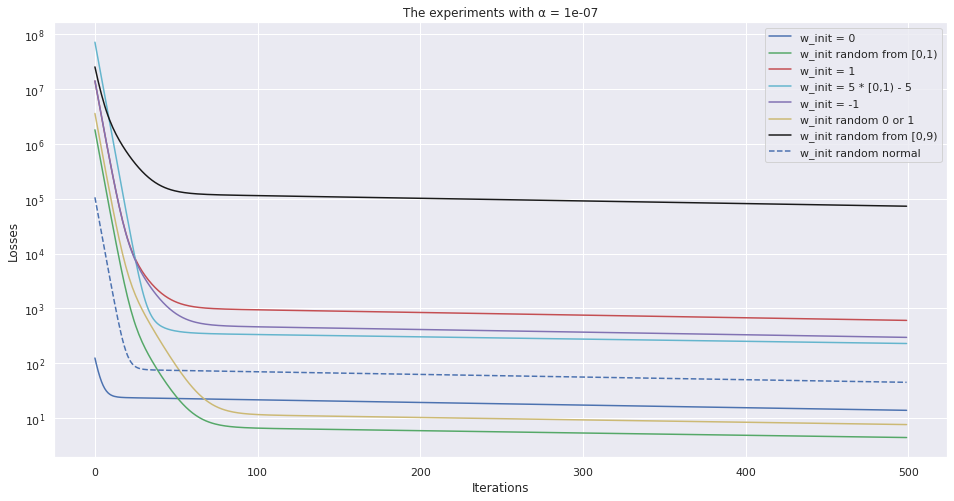

In [202]:
# The experimet with α = 10**(-7) and w_init.
# random 4

y = datY

w_init0 = np.ones(m+1)*0
w_init1 = np.random.random_sample((m+1,))
w_init2 = np.ones(m+1)*1
w_init3 = 5 * np.random.random_sample((m+1,)) - 5
w_init4 = np.ones(m+1)*(-1)
w_init5 = np.random.randint(2, size=m+1)
w_init6 = np.random.randint(10, size=m+1)
w_init7 = np.random.normal(size=(m+1), scale=0.1)

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

alpha = 10**(-7)
weights0, losses0 = gradDescent(w_init0, alpha, X, y, maxiter=500, eps=1e-2)
weights1, losses1 = gradDescent(w_init1, alpha, X, y, maxiter=500, eps=1e-2)
weights2, losses2 = gradDescent(w_init2, alpha, X, y, maxiter=500, eps=1e-2)
weights3, losses3 = gradDescent(w_init3, alpha, X, y, maxiter=500, eps=1e-2)
weights4, losses4 = gradDescent(w_init4, alpha, X, y, maxiter=500, eps=1e-2)
weights5, losses5 = gradDescent(w_init5, alpha, X, y, maxiter=500, eps=1e-2)
weights6, losses6 = gradDescent(w_init6, alpha, X, y, maxiter=500, eps=1e-2)
weights7, losses7 = gradDescent(w_init7, alpha, X, y, maxiter=500, eps=1e-2)

ax.plot(losses0,'b-', label='w_init = 0')
ax.plot(losses1,'g-', label='w_init random from [0,1)')
ax.plot(losses2,'r-', label='w_init = 1')
ax.plot(losses3,'c-', label='w_init = 5 * [0,1) - 5')
ax.plot(losses4,'m-', label='w_init = -1')
ax.plot(losses5,'y-', label='w_init random 0 or 1')
ax.plot(losses6,'k-', label='w_init random from [0,9)')
ax.plot(losses7,'b--', label='w_init random normal')
        
plt.title('The experiments with α = {}'.format(alpha))
plt.ylabel('Losses')   
plt.xlabel('Iterations')

ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

### Conclusion:

Due to the fact that the data is generated randomly, the values when calculating the gradient are different for each set. The optimal solution is not easy to choose, as each time the data is generated, a different w_init gives better results. 

In this testing, three options, in my opinion, have priority for use:

**- w_init = 0**

**- w_init = random normal**

**w_init = 0** gives a stable solution (the loss estimate remains at the same level).
**w_init random normal** has a runaway value, but it can also improve the result of the loss.

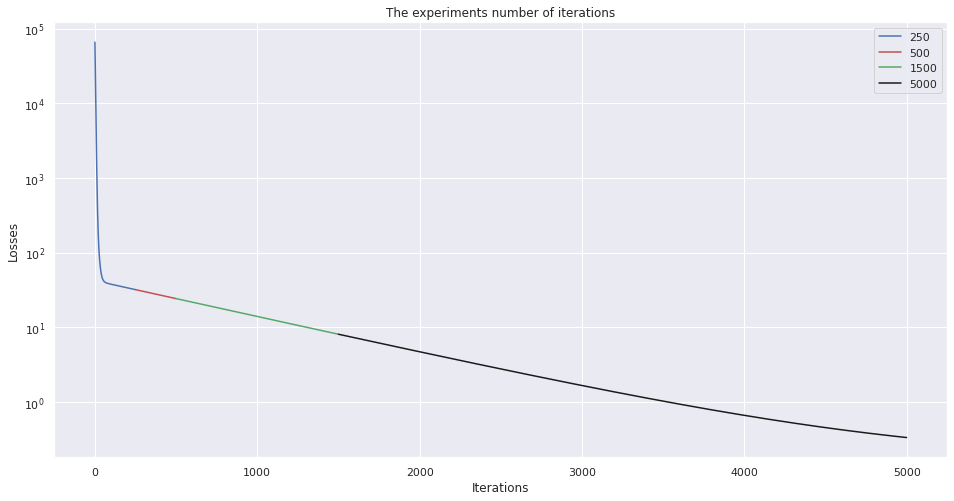

In [203]:
# The experimet with α = 10**(-7) with number of iterations.

y = datY

w_init = np.random.normal(size=(m+1), scale=0.1)

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

alpha = 10**(-7)
weights, losses = gradDescent(w_init, alpha, X, y, maxiter=5000, eps=1e-2)


ax.plot(range(0,250), losses[0:250],'b-', label='250')
ax.plot(range(250,500), losses[250:500],'r-', label='500')
ax.plot(range(500,1500), losses[500:1500],'g-', label='1500')
ax.plot(range(1500,5000), losses[1500:5000],'k-', label='5000')

plt.title('The experiments number of iterations')
plt.ylabel('Losses')   
plt.xlabel('Iterations')

ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

### Conclusion:

In this case, with an increase in the number of iterations, there is an opportunity to improve the solution. The graph shows that with an increase in the number of iterations, the value of the loss function decreases.

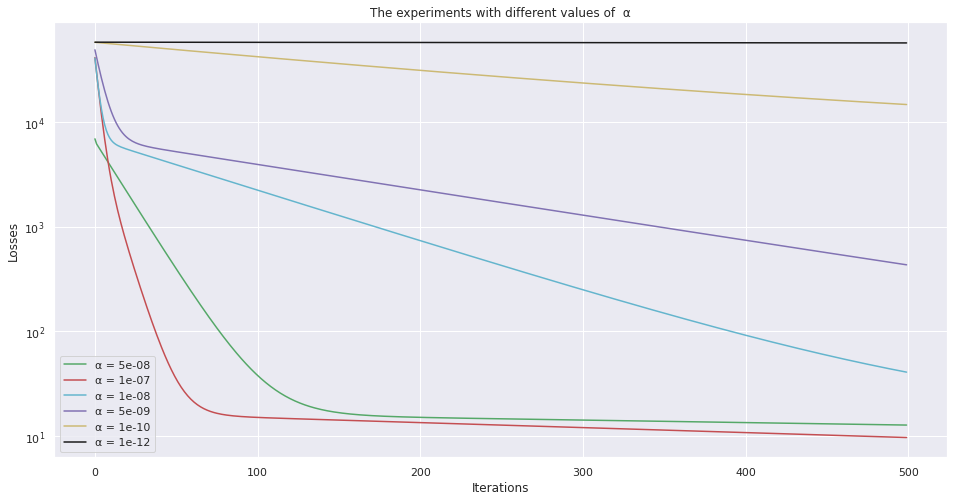

In [105]:
# Experiment with different values of  α

y = datY
w_init = np.random.normal(size=(m+1), scale=0.1)
ones = np.ones([N, 1])

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

alpha = 10**(-7)/2
weights1, losses1 = gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2)
ax.plot(range(len(losses1)), losses1,'g-', label='α = {}' .format(alpha))

alpha = 10**(-7)
weights2, losses2 = gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2)
ax.plot(range(len(losses2)), losses2,'r-', label='α = {}' .format(alpha))

alpha = 10**(-8)
weights3, losses3 = gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2)
ax.plot(range(len(losses3)), losses3,'c-', label='α = {}' .format(alpha))

alpha = 10**(-8)/2
weights4, losses4 = gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2)
ax.plot(range(len(losses4)), losses4,'m-', label='α = {}' .format(alpha))

alpha = 10**(-10)
weights5, losses5 = gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2)
ax.plot(range(len(losses5)), losses5,'y-', label='α = {}' .format(alpha))

alpha = 10**(-12)
weights6, losses6 = gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2)
ax.plot(range(len(losses6)), losses6,'k-', label='α = {}' .format(alpha))

plt.title('The experiments with different values of  α')
plt.ylabel('Losses')   
plt.xlabel('Iterations')

ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

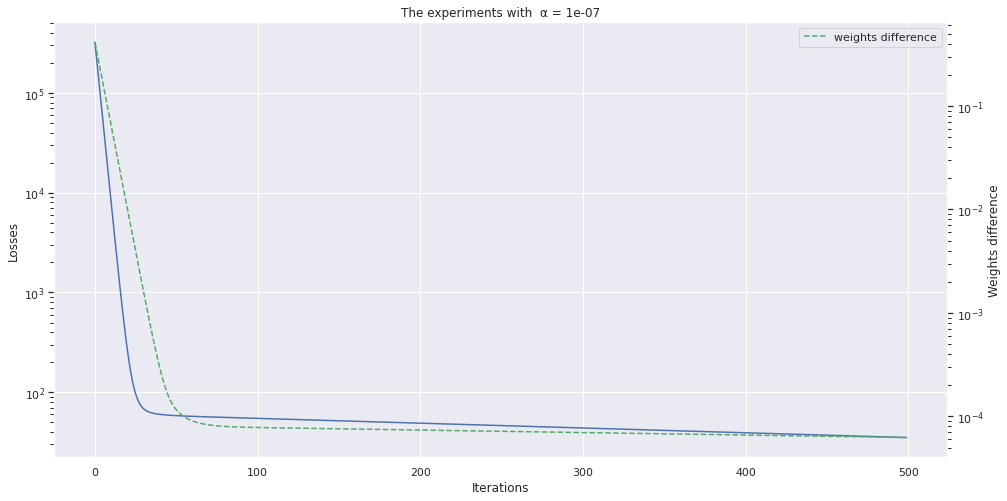

In [97]:
# The experimet with α = 10**(-7) + the weights difference is added.

alpha = 10**(-7)
y = datY
w_init = np.random.normal(size=(m+1), scale=0.1)
weights, losses = gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2)
                                   
weights_diff = [np.linalg.norm(weights[i+1]-weights[i]) for i in range(len(weights) - 1)]
                                   
fig, ax = plt.subplots(figsize=(16,8))
ax2 = ax.twinx()

ax.plot(range(len(losses)), losses, 'b-', label='losses') 
ax2.plot(range(len(weights_diff)), weights_diff, 'g--', label='weights difference')
 
ax.set_xlabel("Iterations")
ax.set_ylabel("Losses")
ax2.set_ylabel("Weights difference")
plt.title('The experiments with  α = {}' .format(alpha))
                                   
ax2.grid(False)
ax.set_yscale('log')
ax2.set_yscale('log')
#ax2.set_xscale('log')
plt.legend(loc='best')
plt.show()  

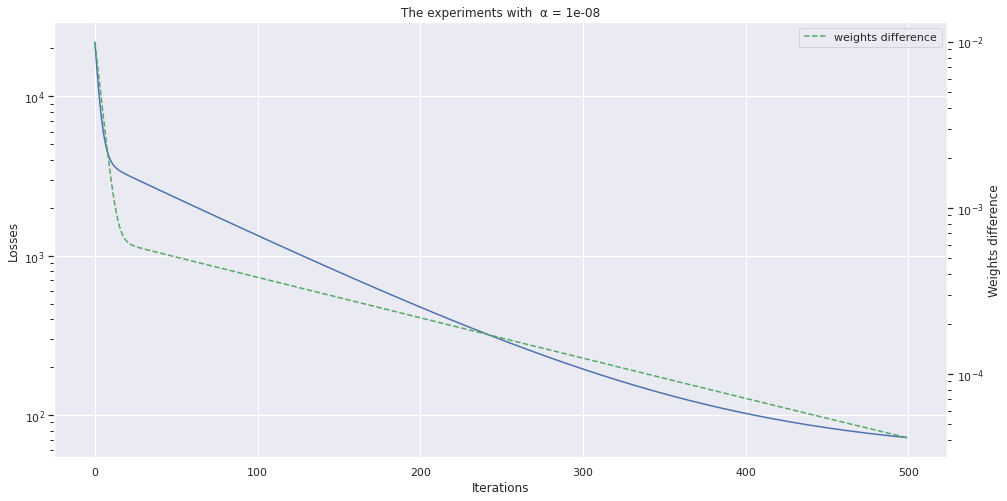

In [95]:
# The experimet with α = 10**(-8) + the weights difference is added.

alpha = 10**(-8)
y = datY
w_init = np.random.normal(size=(m+1), scale=0.1)
weights, losses = gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2)
                                   
weights_diff = [np.linalg.norm(weights[i+1]-weights[i]) for i in range(len(weights) - 1)]
                                   
fig, ax = plt.subplots(figsize=(16,8))
ax2 = ax.twinx()

ax.plot(range(len(losses)), losses, 'b-', label='losses') 
ax2.plot(range(len(weights_diff)), weights_diff, 'g--', label='weights difference')
 
ax.set_xlabel("Iterations")
ax.set_ylabel("Losses")
ax2.set_ylabel("Weights difference")
plt.title('The experiments with  α = {}' .format(alpha))
                                   
ax2.grid(False)
ax.set_yscale('log')
ax2.set_yscale('log')
#ax2.set_xscale('log')
plt.legend(loc='best')
plt.show()  

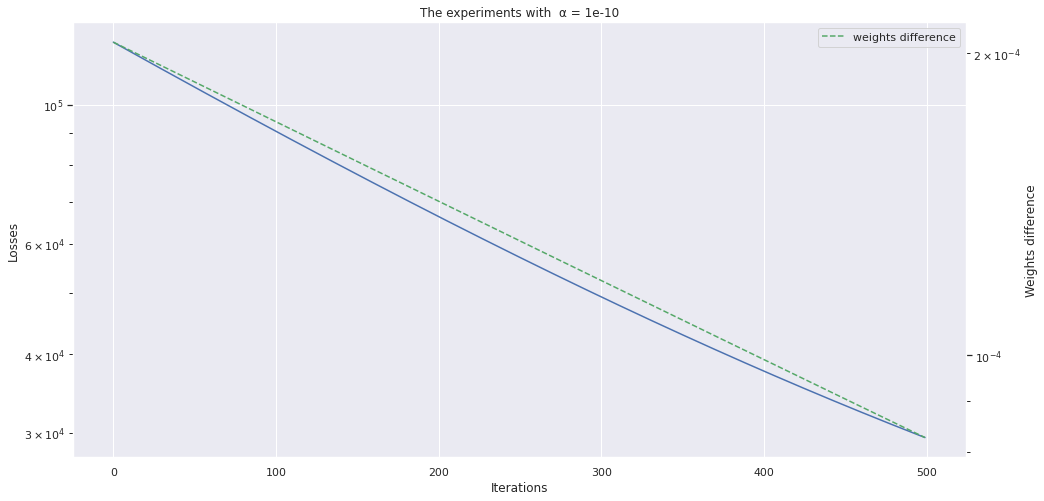

In [204]:
# The experimet with α = 10**(-10) + the weights difference is added.

alpha = 10**(-10)
y = datY
w_init = np.random.normal(size=(m+1), scale=0.1)
weights, losses = gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2)
                                   
weights_diff = [np.linalg.norm(weights[i+1]-weights[i]) for i in range(len(weights) - 1)]
                                   
fig, ax = plt.subplots(figsize=(16,8))
ax2 = ax.twinx()

ax.plot(range(len(losses)), losses, 'b-', label='losses') 
ax2.plot(range(len(weights_diff)), weights_diff, 'g--', label='weights difference')
 
ax.set_xlabel("Iterations")
ax.set_ylabel("Losses")
ax2.set_ylabel("Weights difference")
plt.title('The experiments with  α = {}' .format(alpha))
                                   
ax2.grid(False)
ax.set_yscale('log')
ax2.set_yscale('log')
#ax2.set_xscale('log')
plt.legend(loc='best')
plt.show()  

### Conclusions according to the experiments:

- Choosing **w_init** to initialize the gradient descent start process affects the behaviour of the loss function, it affects the convergence of the process and its speed. In my experiments, the best turned out to be **w_init = np.random.normal(size=(m+1), scale=0.1)**.


- The choice of **alpha** is not always obvious (despite the fact that there are practical recommendations for the learning rate in the range between 0 and 1.

-- If learning rate is too small, it takes more time but converges to the minimum.
-- If learning rate is very large, it overshoots and diverges, moves away from the minima, performance decreases on learning.

-- **Note**: Decreasing the step does not always lead to an improvement in the model.  In our case, as the step decreases, the model diverges (for example, see results e7 and e12).

-- In my experiments, the best turned out to be $\alpha = {10}^{-7}$.


- The **number of iterations** affects the accuracy of the calculations of the loss function and procces speed.  Depending on the data, sometimes the behavior of the loss function can change only slightly starting from some iteration.  In this case, it makes sense to stop the descent process earlier.



Thus, **there is no predefined method for choosing the correct set of hyperparameters for a model.  The only way to set a parameter is to try it.**

Let us check the adequacy of the model we created.

Choose several (no less then five) houses (inputs in your `X` matrix) and calculte predicted prices by:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

In [492]:
# TEST 1 BAD

alpha = 10**(-7)
y = datY
w_init = np.random.normal(size=(m+1), scale=0.1)
weights, losses = gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2)

In [493]:
# TEST 1 BAD

w = weights[-1]
ones = np.ones([N, 1])
X = np.concatenate([ones, X], axis=1)
y_predicted = np.dot(X,w)
y_mean = y.mean()

MAE = np.abs(np.subtract(y,y_predicted)).mean()
MSE = np.square(np.subtract(y,y_predicted)).mean() 
RSME = np.sqrt(np.square(np.subtract(y,y_predicted)).mean())
R_squared = 1 - np.sum(np.square(np.subtract(y,y_predicted))) / np.sum(np.square(np.subtract(y,y_mean)))

print('y', y)
print('y_predicted', y_predicted)
print('MAE =', MAE)
print('MSE =', MSE)
print('RMSE =', RSME)
print('R_squared =', R_squared)

y [13.36138028 13.031782   12.36307639 ... 12.01370075 12.89921983
 12.9456262 ]
y_predicted [25.43560394 13.42300153 -1.50125725 ... -9.26198227  3.37926584
 -8.3412845 ]
MAE = 9.92802283659433
MSE = 143.31112935399457
RMSE = 11.971262646604767
R_squared = -516.3227473614286


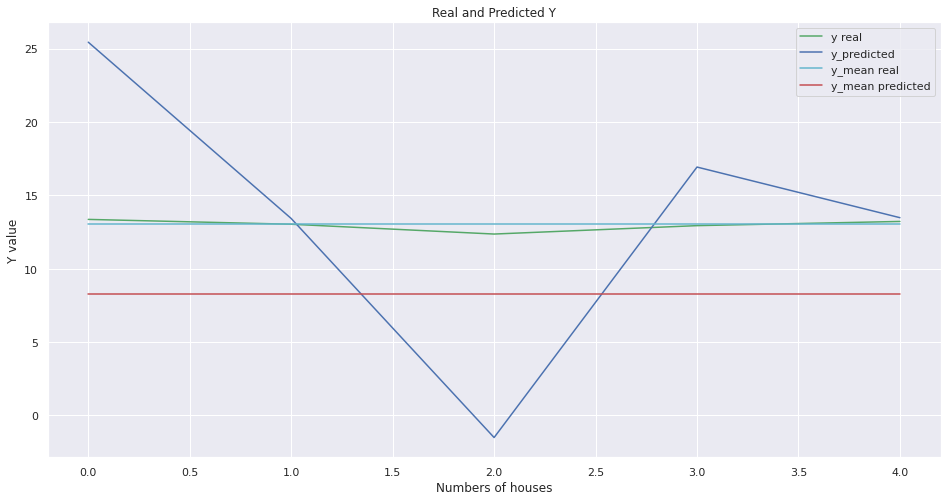

In [494]:
# TEST 1 BAD

# Let's compare the first 5 houses from [n:m] range (maximal [0:1500])

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)
y_mean = np.ones([N, 1])* y.mean()
y_mean_pr = np.ones([N, 1])* y_predicted.mean()

n = 0
m = 5

ax.plot(range(n,m), y[n:m],'g-', label='y real')
ax.plot(range(n,m), y_predicted[n:m],'b-', label='y_predicted')
ax.plot(range(n,m), y_mean[n:m],'c-', label='y_mean real')
ax.plot(range(n,m), y_mean_pr[n:m],'r-', label='y_mean predicted')

plt.title('Real and Predicted Y')
plt.ylabel('Y value')   
plt.xlabel('Numbers of houses')

#ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

In [495]:
print('y real = ' , y[n:m])
print('y real mean = ' , y[n:m].mean())
print('y predicted = ' , y_predicted[n:m])
print('difference = ' , y[n:m] - y_predicted[n:m])
print('difference mean (MAE[n:m]) = ' , abs((y[n:m] - y_predicted[n:m])).mean())

y real =  [13.36138028 13.031782   12.36307639 12.9360338  13.22220871]
y real mean =  12.982896236594929
y predicted =  [25.43560394 13.42300153 -1.50125725 16.92818075 13.47790033]
difference =  [-12.07422366  -0.39121953  13.86433364  -3.99214695  -0.25569162]
difference mean (MAE[n:m]) =  6.115523079998631


## Conclusion

As we can see from the first five houses considered, the results obtained are rather bad. 

**Mean y real = 12.98** when **mean predicted error = 6.12**. This is a lot.

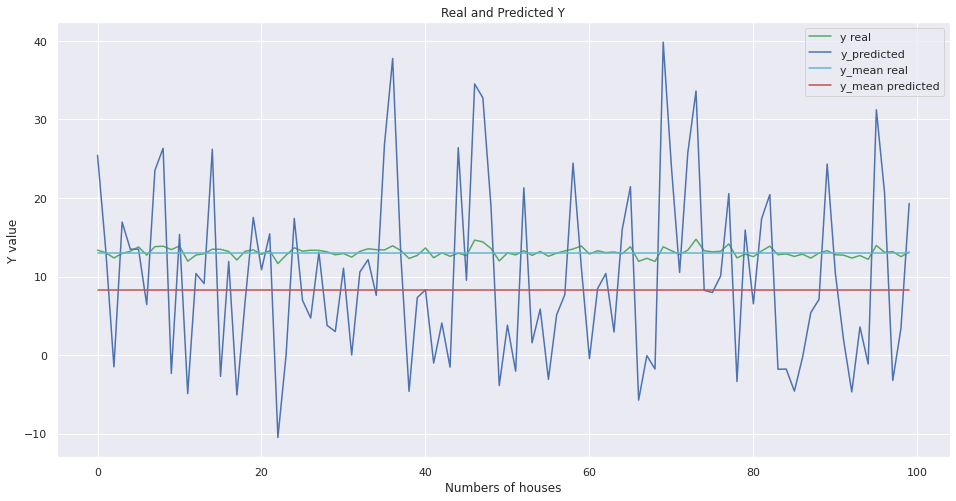

In [496]:
# TEST 1 BAD

# Visualisaion of more predicted data

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)
y_mean = np.ones([N, 1])* y.mean()
y_mean_pr = np.ones([N, 1])* y_predicted.mean()

n = 0
m = 100

ax.plot(range(n,m), y[n:m],'g-', label='y real')
ax.plot(range(n,m), y_predicted[n:m],'b-', label='y_predicted')
ax.plot(range(n,m), y_mean[n:m],'c-', label='y_mean real')
ax.plot(range(n,m), y_mean_pr[n:m],'r-', label='y_mean predicted')

plt.title('Real and Predicted Y')
plt.ylabel('Y value')   
plt.xlabel('Numbers of houses')

#ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

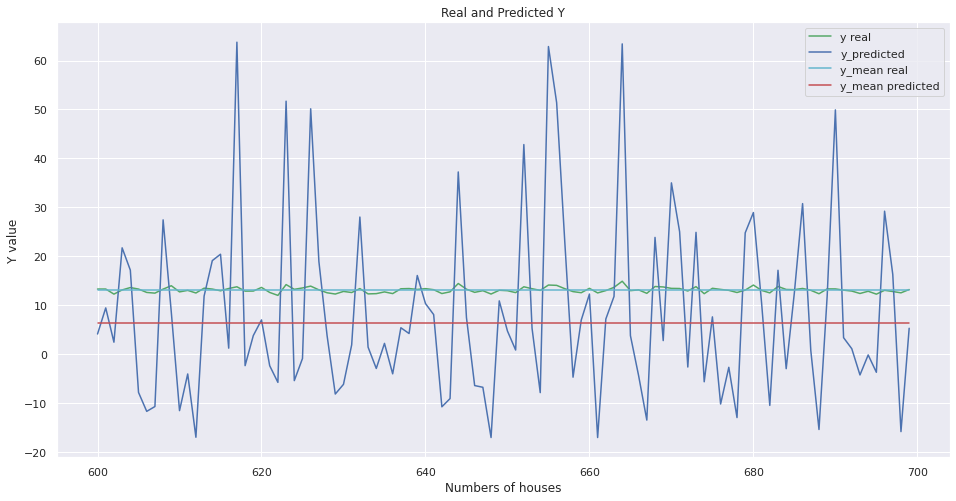

In [255]:
# TEST 1 BAD

# Visualisaion of more predicted data

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)
y_mean = np.ones([N, 1])* y.mean()
y_mean_pr = np.ones([N, 1])* y_predicted.mean()

n = 600
m = 700

ax.plot(range(n,m), y[n:m],'g-', label='y real')
ax.plot(range(n,m), y_predicted[n:m],'b-', label='y_predicted')
ax.plot(range(n,m), y_mean[n:m],'c-', label='y_mean real')
ax.plot(range(n,m), y_mean_pr[n:m],'r-', label='y_mean predicted')

plt.title('Real and Predicted Y')
plt.ylabel('Y value')   
plt.xlabel('Numbers of houses')

#ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

In [497]:
# TEST 2 GOOD

alpha = 10**(-7)
y = datY
w_init = np.random.normal(size=(m+1), scale=0.1)
weights, losses = gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2)

In [498]:
w = weights[-1]
ones = np.ones([N, 1])
X = np.concatenate([ones, X], axis=1)
y_predicted = np.dot(X,w)
y_mean = y.mean()

MAE = np.abs(np.subtract(y,y_predicted)).mean()
MSE = np.square(np.subtract(y,y_predicted)).mean() 
RSME = np.sqrt(np.square(np.subtract(y,y_predicted)).mean())
R_squared = 1 - np.sum(np.square(np.subtract(y,y_predicted))) / np.sum(np.square(np.subtract(y,y_mean)))

print('y', y)
print('y_predicted', y_predicted)
print('MAE =', MAE)
print('MSE =', MSE)
print('RMSE =', RSME)
print('R_squared =', R_squared)

y [13.36138028 13.031782   12.36307639 ... 12.01370075 12.89921983
 12.9456262 ]
y_predicted [13.61766052 13.04950292 12.66254259 ... 12.31356808 12.93855321
 12.3424875 ]
MAE = 0.36100973999454145
MSE = 0.20910782527696029
RMSE = 0.45728309095893793
R_squared = 0.24516515113182014


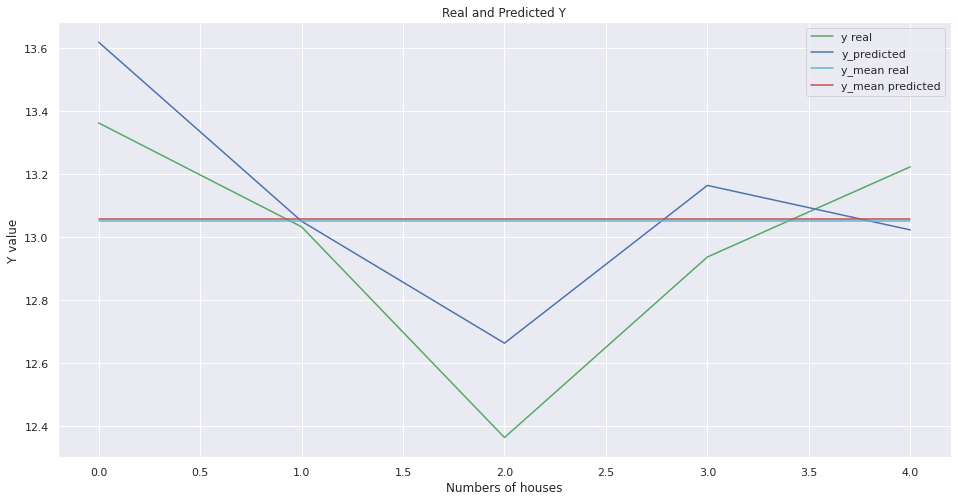

In [499]:
# TEST 2 GOOD

# Let's compare the first 5 houses from [n:m] range (maximal [0:1500])

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)
y_mean = np.ones([N, 1])* y.mean()
y_mean_pr = np.ones([N, 1])* y_predicted.mean()

n = 0
m = 5

ax.plot(range(n,m), y[n:m],'g-', label='y real')
ax.plot(range(n,m), y_predicted[n:m],'b-', label='y_predicted')
ax.plot(range(n,m), y_mean[n:m],'c-', label='y_mean real')
ax.plot(range(n,m), y_mean_pr[n:m],'r-', label='y_mean predicted')

plt.title('Real and Predicted Y')
plt.ylabel('Y value')   
plt.xlabel('Numbers of houses')

#ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

In [500]:
print('y real = ' , y[n:m])
print('y real mean = ' , y[n:m].mean())
print('y predicted = ' , y_predicted[n:m])
print('difference = ' , y[n:m] - y_predicted[n:m])
print('difference mean (MAE[n:m]) = ' , abs((y[n:m] - y_predicted[n:m])).mean())

y real =  [13.36138028 13.031782   12.36307639 12.9360338  13.22220871]
y real mean =  12.982896236594929
y predicted =  [13.61766052 13.04950292 12.66254259 13.16315646 13.02192405]
difference =  [-0.25628024 -0.01772092 -0.2994662  -0.22712266  0.20028467]
difference mean (MAE[n:m]) =  0.20017493683119553


### Conclusion:

As we can see from the first five houses considered, the results obtained are good.

**Mean y real = 12.98** when **mean predicted error = 0.2**. This is good.

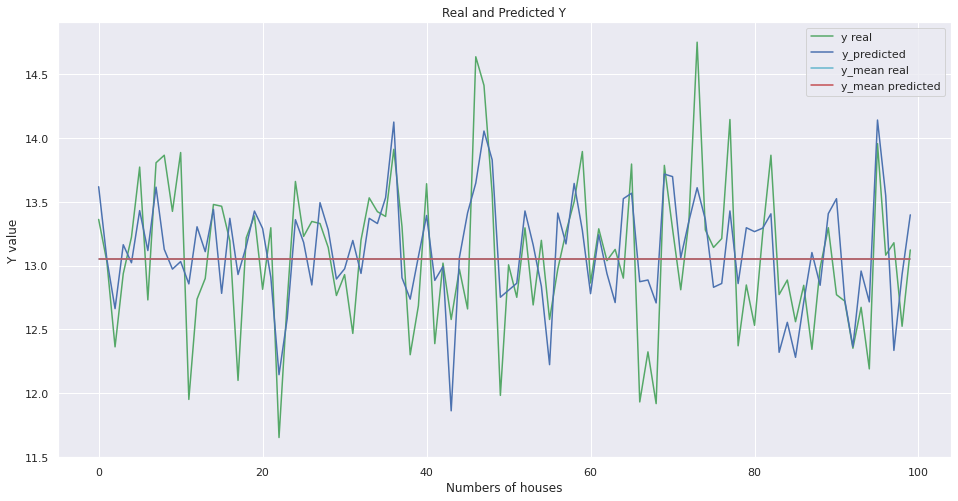

In [502]:
# TEST 2 GOOD

# Visualisaion of more predicted data

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)
y_mean = np.ones([N, 1])* y.mean()
y_mean_pr = np.ones([N, 1])* y_predicted.mean()

n = 0
m = 100

ax.plot(range(n,m), y[n:m],'g-', label='y real')
ax.plot(range(n,m), y_predicted[n:m],'b-', label='y_predicted')
ax.plot(range(n,m), y_mean[n:m],'c-', label='y_mean real')
ax.plot(range(n,m), y_mean_pr[n:m],'r-', label='y_mean predicted')

plt.title('Real and Predicted Y')
plt.ylabel('Y value')   
plt.xlabel('Numbers of houses')

#ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

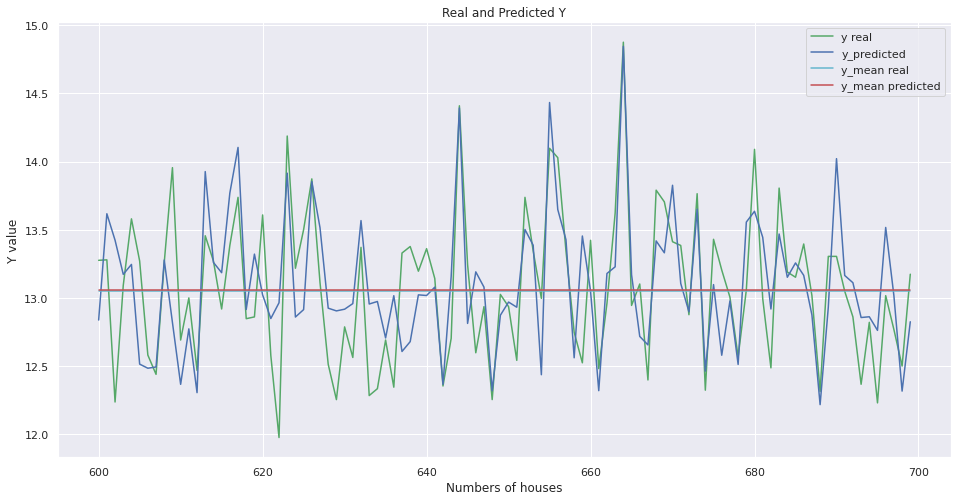

In [503]:
# TEST 2 GOOD

# Visualisaion of more predicted data

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)
y_mean = np.ones([N, 1])* y.mean()
y_mean_pr = np.ones([N, 1])* y_predicted.mean()

n = 600
m = 700

ax.plot(range(n,m), y[n:m],'g-', label='y real')
ax.plot(range(n,m), y_predicted[n:m],'b-', label='y_predicted')
ax.plot(range(n,m), y_mean[n:m],'c-', label='y_mean real')
ax.plot(range(n,m), y_mean_pr[n:m],'r-', label='y_mean predicted')

plt.title('Real and Predicted Y')
plt.ylabel('Y value')   
plt.xlabel('Numbers of houses')

#ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

Compare predicted values with an actual answer (stored in your `y` array). Is it satisfying enough? (**1 point**)

# Test 1

I took the optimal parameters selected by me. 

**The calculations errors:**

**MAE** = 9.92802283659433         <--- large enough

**MSE** = 143.31112935399457         <--- large enough

**RMSE** = 11.971262646604767       <--- large enough

**R_squared** = -516.3227473614286  <--- shows the unreliability of the calculated data


The graphs show that, in comparison with the y_real values, the y_predicted values have a rather large amplitude of changes (it  jumps up and down along the axis).


## Conclusion 1

According to the graphs provided and the calculated errors of the method it can be concluded that the model needs to be improved further. 


# Test 2

**The calculations errors:**

**MAE** = 0.36100973999454145         <--- looks good

**MSE** = 0.20910782527696029        <--- looks good

**RMSE** = 0.457283090958937939         <--- looks good

**R_squared** = 0.24516515113182014  <--- shows then the model can be imroved

The graphs show that the y_predicted values follow the y_real changes.


## Conclusion 2

According to the graphs provided and the calculated errors of the method it can be concluded that the model is good and the values can be used furher.


## Extra

These two tests show well how difficult it is to choose the initial conditions for triggering gradient descent. That is, in a situation where the parameters lead the model to a certain solution that satisfies the given conditions, there is always an assessment of the results obtained.
The format of the input data for both tests is the same, the numerical values of w_init are different, but the data of test 1 is practically unusable, and the data of model 2 can be used (if there are no more stringent restrictions on errors, etc.).

In [22]:
# R_squared check

# Detecting Multicollinearity with VIF – Python

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

columns = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 
            'grade', 'sqft_above', 'sqft_basement', 'long', 'lat']
data = datX[columns]

vif_data = pd.DataFrame()
vif_data["feature"] = data.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]
  
print(vif_data)

         feature           VIF
0       bedrooms  2.224529e+01
1      bathrooms  2.528447e+01
2    sqft_living           inf
3         floors  1.589054e+01
4      condition  3.131287e+01
5          grade  1.252510e+02
6     sqft_above           inf
7  sqft_basement           inf
8           long  1.165427e+05
9            lat  1.171346e+05


## Extra 2

The behavior of **R_squared** shows that we should think about input data validation. **Multicollinearity** is possible.

When independent variables are correlated, it indicates that changes in one variable are associated with shifts in another variable. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison.

The values of VIF for some variables are quite high, therefore, indeed, multicollinearity takes place. Because of this, it is not easy to get good results in view of the input data.

**By removing some of the variables from the model, the results of the predicted data can be improved.**

### Task 6. Data transformation

As you have probably already seen above, the convergence of the gradient descent is not ideal for our data. One way to overcome this is to transform the input data so that:
+ the **average** of each feature should be $0$
+ the **standard deviation** of each feature should be $1$

In such a way levels of the loss function would be close to circles; thus one should hope to faster convergence.

Implement such normalisation:

In [24]:
def norm(X):
    
    X_norm = X.copy()

    X_norm = np.subtract(X_norm, np.mean(X, axis=0)) / np.std(X, axis=0)
    
    return X_norm

### Task 7. And again (2 points)

Repeat gradient descent experiments for different $\alpha$s, now with transformed data.

+ Run at least two experiments with different $\alpha$
+ At least two experiments should be convergent

1. Provide `loss` plots for those experiments (on the same graph). (**1 point**)
2. Are optimized weights the same? Illustrate it (plot it or show differences in other way)

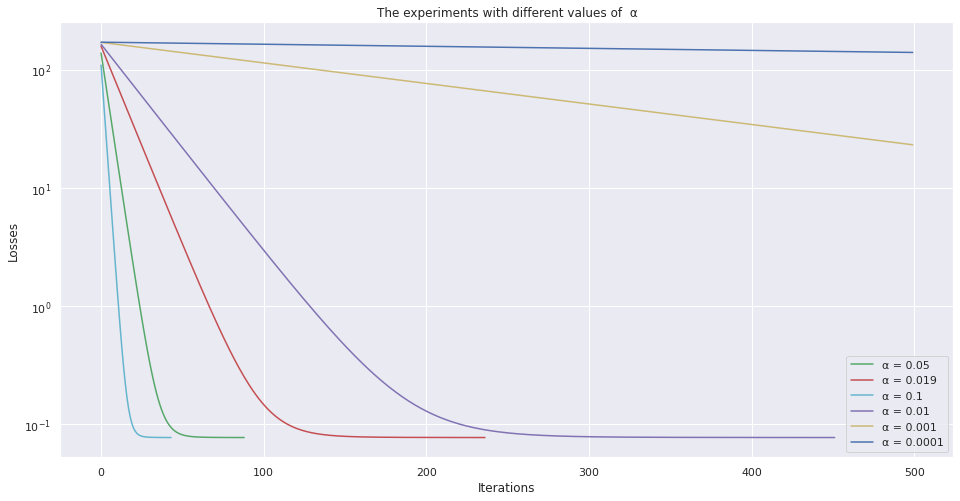

In [14]:
# Experiment with different values of  α

y = datY
X_n = norm(X)
w_init = np.random.normal(size=(m+1), scale=0.1)
ones = np.ones([N, 1])

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

alpha = 0.05
weights1, losses1 = gradDescent(w_init, alpha, X_n, y, maxiter=500, eps=1e-2)
ax.plot(range(len(losses1)), losses1,'g-', label='α = {}' .format(alpha))

alpha = 0.019
weights2, losses2 = gradDescent(w_init, alpha, X_n, y, maxiter=500, eps=1e-2)
ax.plot(range(len(losses2)), losses2,'r-', label='α = {}' .format(alpha))

alpha = 0.1
weights3, losses3 = gradDescent(w_init, alpha, X_n, y, maxiter=500, eps=1e-2)
ax.plot(range(len(losses3)), losses3,'c-', label='α = {}' .format(alpha))

alpha = 0.01
weights4, losses4 = gradDescent(w_init, alpha, X_n, y, maxiter=500, eps=1e-2)
ax.plot(range(len(losses4)), losses4,'m-', label='α = {}' .format(alpha))

alpha = 0.001
weights5, losses5 = gradDescent(w_init, alpha, X_n, y, maxiter=500, eps=1e-2)
ax.plot(range(len(losses5)), losses5,'y-', label='α = {}' .format(alpha))

alpha = 0.0001
weights6, losses6 = gradDescent(w_init, alpha, X_n, y, maxiter=500, eps=1e-2)
ax.plot(range(len(losses6)), losses6,'b-', label='α = {}' .format(alpha))

plt.title('The experiments with different values of  α')
plt.ylabel('Losses')   
plt.xlabel('Iterations')

ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

In [15]:
print('converges')
print('alpha = 0.05   ', 'w0 =', weights1[-1][1])
print('alpha = 0.19   ', 'w0 =', weights2[-1][1])
print('alpha = 0.1    ', 'w0 =', weights3[-1][1])
print('alpha = 0.01   ', 'w0 =', weights4[-1][1])

print()
print("doesn't converges")
print('alpha = 0.001   ', 'w0 =', weights5[-1][1])
print('alpha = 0.0001  ', 'w0 =', weights6[-1][1])

converges
alpha = 0.05    w0 = -0.016051460826950196
alpha = 0.19    w0 = -0.01605476277647346
alpha = 0.1     w0 = -0.016073586028989943
alpha = 0.01    w0 = -0.01605697292898354

doesn't converges
alpha = 0.001    w0 = 0.033583973719048955
alpha = 0.0001   w0 = 0.04692714637631995


In [16]:
print('converges')
print('alpha = 0.05   ', 'w1 =', weights1[-1][1])
print('alpha = 0.19   ', 'w1 =', weights2[-1][1])
print('alpha = 0.1    ', 'w1 =', weights3[-1][1])
print('alpha = 0.01   ', 'w1 =', weights4[-1][1])

print()
print("doesn't converges")
print('alpha = 0.001   ', 'w1 =', weights5[-1][1])
print('alpha = 0.0001  ', 'w1 =', weights6[-1][1])

converges
alpha = 0.05    w1 = -0.016051460826950196
alpha = 0.19    w1 = -0.01605476277647346
alpha = 0.1     w1 = -0.016073586028989943
alpha = 0.01    w1 = -0.01605697292898354

doesn't converges
alpha = 0.001    w1 = 0.033583973719048955
alpha = 0.0001   w1 = 0.04692714637631995


In [17]:
print('converges')
print('alpha = 0.05   ', 'w2 =', weights1[-1][2])
print('alpha = 0.19   ', 'w2 =', weights2[-1][2])
print('alpha = 0.1    ', 'w2 =', weights3[-1][2])
print('alpha = 0.01   ', 'w2 =', weights4[-1][2])

print()
print("doesn't converges")
print('alpha = 0.001   ', 'w2 =', weights5[-1][2])
print('alpha = 0.0001  ', 'w2 =', weights6[-1][2])

converges
alpha = 0.05    w2 = 0.02372466992697897
alpha = 0.19    w2 = 0.023612997754583517
alpha = 0.1     w2 = 0.023679355881319482
alpha = 0.01    w2 = 0.023570875406571788

doesn't converges
alpha = 0.001    w2 = 0.10881938540352931
alpha = 0.0001   w2 = 0.0896371823592261


In [18]:
print('converges')
print('alpha = 0.05   ', 'w3 =', weights1[-1][3])
print('alpha = 0.19   ', 'w3 =', weights2[-1][3])
print('alpha = 0.1    ', 'w3 =', weights3[-1][3])
print('alpha = 0.01   ', 'w3 =', weights4[-1][3])

print()
print("doesn't converges")
print('alpha = 0.001   ', 'w3 =', weights5[-1][3])
print('alpha = 0.0001  ', 'w3 =', weights6[-1][3])

converges
alpha = 0.05    w3 = 0.08658828268320873
alpha = 0.19    w3 = 0.086659504443055
alpha = 0.1     w3 = 0.08661307866201519
alpha = 0.01    w3 = 0.08668619526198662

doesn't converges
alpha = 0.001    w3 = 0.0302093329693641
alpha = 0.0001   w3 = -0.040130112024708106


In [19]:
print('converges')
print('alpha = 0.05   ', 'w4 =', weights1[-1][3])
print('alpha = 0.19   ', 'w4 =', weights2[-1][3])
print('alpha = 0.1    ', 'w4 =', weights3[-1][3])
print('alpha = 0.01   ', 'w4 =', weights4[-1][3])

print()
print("doesn't converges")
print('alpha = 0.001   ', 'w4 =', weights5[-1][3])
print('alpha = 0.0001  ', 'w4 =', weights6[-1][3])

converges
alpha = 0.05    w4 = 0.08658828268320873
alpha = 0.19    w4 = 0.086659504443055
alpha = 0.1     w4 = 0.08661307866201519
alpha = 0.01    w4 = 0.08668619526198662

doesn't converges
alpha = 0.001    w4 = 0.0302093329693641
alpha = 0.0001   w4 = -0.040130112024708106


In [20]:
print('converges')
print('alpha = 0.05   ', 'w5 =', weights1[-1][3])
print('alpha = 0.19   ', 'w5 =', weights2[-1][3])
print('alpha = 0.1    ', 'w5 =', weights3[-1][3])
print('alpha = 0.01   ', 'w5 =', weights4[-1][3])

print()
print("doesn't converges")
print('alpha = 0.001   ', 'w5 =', weights5[-1][3])
print('alpha = 0.0001  ', 'w5 =', weights6[-1][3])

converges
alpha = 0.05    w5 = 0.08658828268320873
alpha = 0.19    w5 = 0.086659504443055
alpha = 0.1     w5 = 0.08661307866201519
alpha = 0.01    w5 = 0.08668619526198662

doesn't converges
alpha = 0.001    w5 = 0.0302093329693641
alpha = 0.0001   w5 = -0.040130112024708106


In [21]:
print('converges')
print('alpha = 0.05   ', 'w6 =', weights1[-1][3])
print('alpha = 0.19   ', 'w6 =', weights2[-1][3])
print('alpha = 0.1    ', 'w6 =', weights3[-1][3])
print('alpha = 0.01   ', 'w6 =', weights4[-1][3])

print()
print("doesn't converges")
print('alpha = 0.001   ', 'w6 =', weights5[-1][3])
print('alpha = 0.0001  ', 'w6 =', weights6[-1][3])

converges
alpha = 0.05    w6 = 0.08658828268320873
alpha = 0.19    w6 = 0.086659504443055
alpha = 0.1     w6 = 0.08661307866201519
alpha = 0.01    w6 = 0.08668619526198662

doesn't converges
alpha = 0.001    w6 = 0.0302093329693641
alpha = 0.0001   w6 = -0.040130112024708106


In [22]:
print('converges')
print('alpha = 0.05   ', 'w7 =', weights1[-1][3])
print('alpha = 0.19   ', 'w7 =', weights2[-1][3])
print('alpha = 0.1    ', 'w7 =', weights3[-1][3])
print('alpha = 0.01   ', 'w7 =', weights4[-1][3])

print()
print("doesn't converges")
print('alpha = 0.001   ', 'w7 =', weights5[-1][3])
print('alpha = 0.0001  ', 'w7 =', weights6[-1][3])

converges
alpha = 0.05    w7 = 0.08658828268320873
alpha = 0.19    w7 = 0.086659504443055
alpha = 0.1     w7 = 0.08661307866201519
alpha = 0.01    w7 = 0.08668619526198662

doesn't converges
alpha = 0.001    w7 = 0.0302093329693641
alpha = 0.0001   w7 = -0.040130112024708106


In [23]:
print('converges')
print('alpha = 0.05   ', 'w8 =', weights1[-1][3])
print('alpha = 0.19   ', 'w8 =', weights2[-1][3])
print('alpha = 0.1    ', 'w8 =', weights3[-1][3])
print('alpha = 0.01   ', 'w8 =', weights4[-1][3])

print()
print("doesn't converges")
print('alpha = 0.001   ', 'w8 =', weights5[-1][3])
print('alpha = 0.0001  ', 'w8 =', weights6[-1][3])

converges
alpha = 0.05    w8 = 0.08658828268320873
alpha = 0.19    w8 = 0.086659504443055
alpha = 0.1     w8 = 0.08661307866201519
alpha = 0.01    w8 = 0.08668619526198662

doesn't converges
alpha = 0.001    w8 = 0.0302093329693641
alpha = 0.0001   w8 = -0.040130112024708106


In [24]:
print('converges')
print('alpha = 0.05   ', 'w9 =', weights1[-1][3])
print('alpha = 0.19   ', 'w9 =', weights2[-1][3])
print('alpha = 0.1    ', 'w9 =', weights3[-1][3])
print('alpha = 0.01   ', 'w9 =', weights4[-1][3])

print()
print("doesn't converges")
print('alpha = 0.001   ', 'w9 =', weights5[-1][3])
print('alpha = 0.0001  ', 'w9 =', weights6[-1][3])

converges
alpha = 0.05    w9 = 0.08658828268320873
alpha = 0.19    w9 = 0.086659504443055
alpha = 0.1     w9 = 0.08661307866201519
alpha = 0.01    w9 = 0.08668619526198662

doesn't converges
alpha = 0.001    w9 = 0.0302093329693641
alpha = 0.0001   w9 = -0.040130112024708106


In [25]:
print('converges')
print('alpha = 0.05   ', 'w10 =', weights1[-1][3])
print('alpha = 0.19   ', 'w10 =', weights2[-1][3])
print('alpha = 0.1    ', 'w10 =', weights3[-1][3])
print('alpha = 0.01   ', 'w10 =', weights4[-1][3])

print()
print("doesn't converges")
print('alpha = 0.001   ', 'w10 =', weights5[-1][3])
print('alpha = 0.0001  ', 'w10 =', weights6[-1][3])

converges
alpha = 0.05    w10 = 0.08658828268320873
alpha = 0.19    w10 = 0.086659504443055
alpha = 0.1     w10 = 0.08661307866201519
alpha = 0.01    w10 = 0.08668619526198662

doesn't converges
alpha = 0.001    w10 = 0.0302093329693641
alpha = 0.0001   w10 = -0.040130112024708106


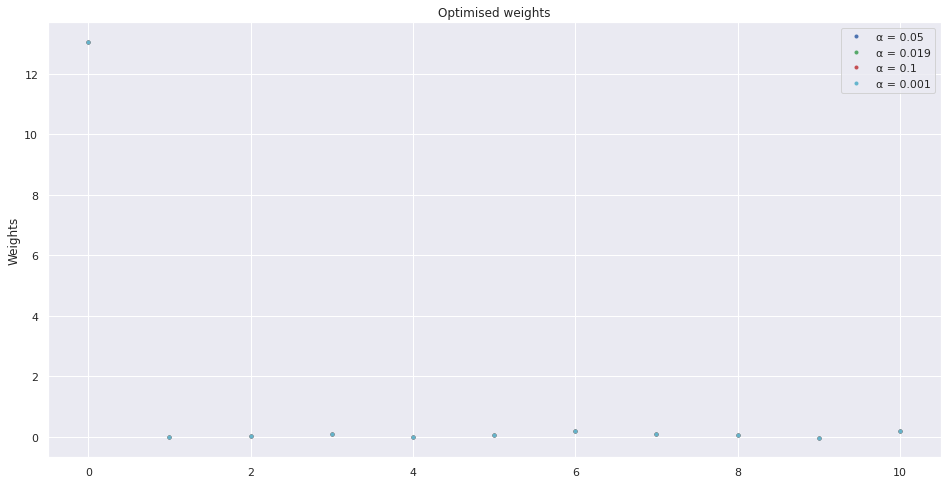

In [26]:
# Optimised weights (converges)

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

alpha = 0.05
ax.plot(weights1[-1],'b.', label='α = {}' .format(alpha))

alpha = 0.019
ax.plot(weights2[-1],'g.', label='α = {}' .format(alpha))

alpha = 0.1
ax.plot(weights3[-1],'r.', label='α = {}' .format(alpha))

alpha = 0.001
ax.plot(weights4[-1],'c.', label='α = {}' .format(alpha))

plt.title('Optimised weights')
plt.ylabel('Weights')   

plt.legend(loc='best')
plt.show()

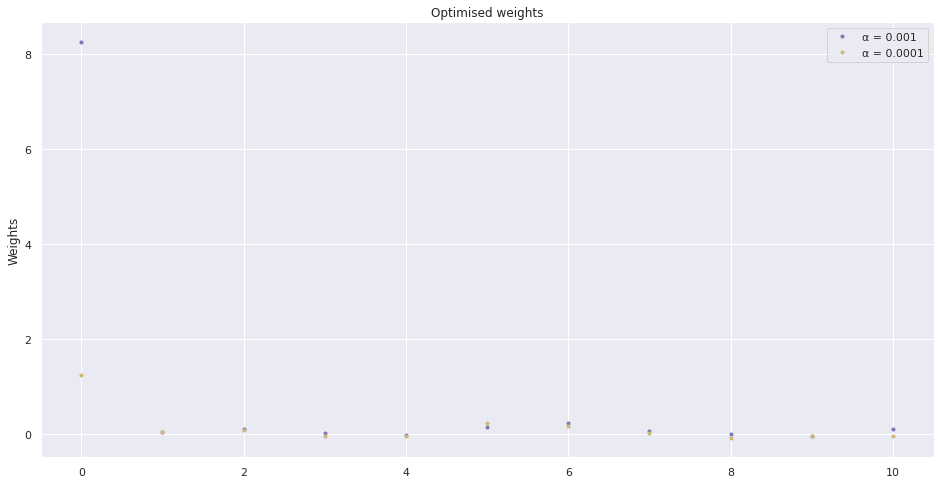

In [27]:
# Optimised weights (doesn't converges)

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

alpha = 0.001
ax.plot(weights5[-1],'m.', label='α = {}' .format(alpha))

alpha = 0.0001
ax.plot(weights6[-1],'y.', label='α = {}' .format(alpha))

plt.title('Optimised weights')
plt.ylabel('Weights')   

#ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

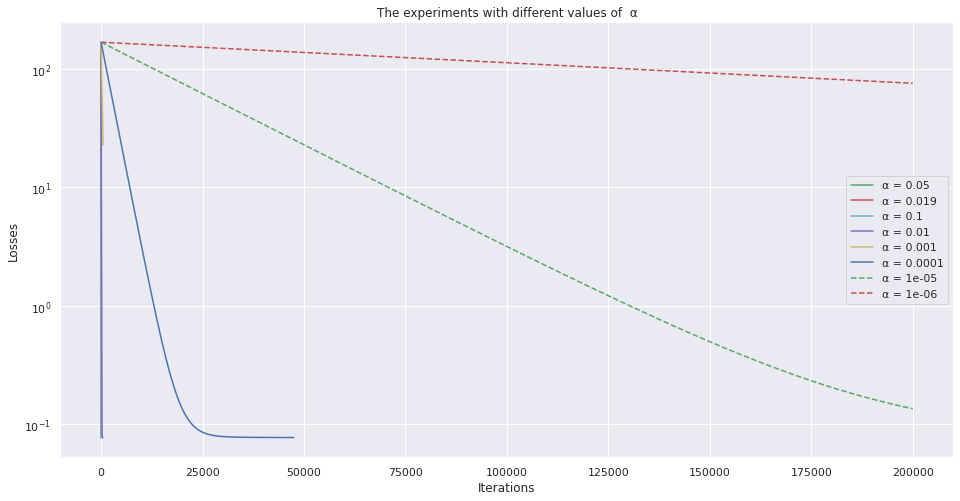

In [330]:
# Experiment with different values of  α + differnt number of iterations

y = datY
X_n = norm(X)
w_init = np.random.normal(size=(m+1), scale=0.1)
ones = np.ones([N, 1])

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

alpha = 0.05
weights1, losses1 = gradDescent(w_init, alpha, X_n, y, maxiter=500, eps=1e-2)
ax.plot(range(len(losses1)), losses1,'g-', label='α = {}' .format(alpha))

alpha = 0.019
weights2, losses2 = gradDescent(w_init, alpha, X_n, y, maxiter=500, eps=1e-2)
ax.plot(range(len(losses2)), losses2,'r-', label='α = {}' .format(alpha))

alpha = 0.1
weights3, losses3 = gradDescent(w_init, alpha, X_n, y, maxiter=500, eps=1e-2)
ax.plot(range(len(losses3)), losses3,'c-', label='α = {}' .format(alpha))

alpha = 0.01
weights4, losses4 = gradDescent(w_init, alpha, X_n, y, maxiter=500, eps=1e-2)
ax.plot(range(len(losses4)), losses4,'m-', label='α = {}' .format(alpha))

alpha = 0.001
weights5, losses5 = gradDescent(w_init, alpha, X_n, y, maxiter=500, eps=1e-2)
ax.plot(range(len(losses5)), losses5,'y-', label='α = {}' .format(alpha))

alpha = 0.0001
weights6, losses6 = gradDescent(w_init, alpha, X_n, y, maxiter=50000, eps=1e-2)
ax.plot(range(len(losses6)), losses6,'b-', label='α = {}' .format(alpha))

alpha = 0.00001
weights7, losses7 = gradDescent(w_init, alpha, X_n, y, maxiter=200000, eps=1e-2)
ax.plot(range(len(losses7)), losses7,'g--', label='α = {}' .format(alpha))

alpha = 0.000001
weights8, losses8 = gradDescent(w_init, alpha, X_n, y, maxiter=200000, eps=1e-2)
ax.plot(range(len(losses8)), losses8,'r--', label='α = {}' .format(alpha))

plt.title('The experiments with different values of  α')
plt.ylabel('Losses')   
plt.xlabel('Iterations')

ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

### Conclusion:

For **alpha = 0.1** the gradient converges in a very fast number of iterations, and the values of the loss function are quite small.

With alpha equal to 0.0001, the gradient with the specified maximum number of iterations (500) does not converge, but converges when the number of iterations increases (it is inconvenient for practice).

### Conclusion:

As we can see, **w_i is close enough if the gradient converges and apart if the gradient diverges**.

In [316]:
# Optimised weights + different w_init

y = datY
X_n = norm(X)
w_init1 = np.random.randint(10, size=m+1)

# converges
alpha = 0.05
weights1, losses1 = gradDescent(w_init, alpha, X_n, y, maxiter=500, eps=1e-2)

alpha = 0.019
weights2, losses2 = gradDescent(w_init, alpha, X_n, y, maxiter=500, eps=1e-2)

alpha = 0.1
weights3, losses3 = gradDescent(w_init, alpha, X_n, y, maxiter=500, eps=1e-2)

alpha = 0.01
weights4, losses4 = gradDescent(w_init, alpha, X_n, y, maxiter=500, eps=1e-2)

# doesn't converges
alpha = 0.001
weights5, losses5 = gradDescent(w_init, alpha, X_n, y, maxiter=500, eps=1e-2)

alpha = 0.0001
weights6, losses6 = gradDescent(w_init, alpha, X_n, y, maxiter=500, eps=1e-2)

In [317]:
weights1[-1]

array([ 1.30472852e+01, -1.98362644e-02,  2.56647492e-02,  1.11881022e-01,
        2.49215832e-03,  6.69141630e-02,  1.93935885e-01,  8.55932145e-02,
        4.95848385e-02, -2.72132229e-02,  1.98086989e-01])

In [318]:
weights2[-1]

array([ 1.30469151e+01, -1.98115956e-02,  2.55836905e-02,  1.11895611e-01,
        2.52423514e-03,  6.68943775e-02,  1.93948144e-01,  8.55928016e-02,
        4.96160377e-02, -2.72064201e-02,  1.98077457e-01])

In [319]:
weights3[-1]

array([ 1.30478539e+01, -1.98537488e-02,  2.56418490e-02,  1.11881575e-01,
        2.53067469e-03,  6.69497424e-02,  1.93950826e-01,  8.55873509e-02,
        4.95970233e-02, -2.72006900e-02,  1.98090182e-01])

In [320]:
weights4[-1]

array([ 1.30468575e+01, -1.97912472e-02,  2.54661928e-02,  1.11914585e-01,
        2.58900988e-03,  6.68924505e-02,  1.93973169e-01,  8.55891199e-02,
        4.96625291e-02, -2.71901457e-02,  1.98067914e-01])

In [321]:
weights5[-1]

array([ 8.29211235e+00,  5.20470417e-04,  1.05107487e-01,  1.01986347e-01,
       -8.03862786e-02, -9.35828289e-03,  1.57120763e-01,  7.65587407e-02,
        4.59479659e-02, -3.76919496e-02,  1.61952650e-01])

In [322]:
weights6[-1]

array([ 1.33740568, -0.00744648,  0.07377933,  0.04334986, -0.17620654,
       -0.06765021,  0.07528945,  0.00277376,  0.06248366, -0.05385187,
        0.09953067])

### Conclusion:


In the situation of **convergence** of the gradient method, **optimised weights values coincide** (or have only a very small difference in values). 

If the gradient method **does not converg**e, then **the values are different**.


### Task 8. Better pay twice (2 points)

Sometimes it is essential to alter the loss function and make it assymetric. Normally, it is motivated by the task itself. For instance, in our case assume that one uses our prediction to bid for an apartment: hence if our $\hat{y}>y$ then we will overpay, but if $\hat{y}<y$ we will not get an apartment, but also won't lose any money. 

Let us introduce our new function:
$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N \begin{cases} a(y_i-\hat{y}_i)^2, \quad y_i>\hat{y}_i \\ b(y_i-\hat{y}_i)^2, \quad y_i\le\hat{y}_i \end{cases}
$$

Implement new loss and new gradient:

In [27]:
def new_loss(w, X, y, a, b):
   
    X_n = norm(X)
    ones = np.ones([N, 1])
    X_n = np.concatenate([ones, X_n], axis=1)
    
    # y predicted value  
    y_predicted = np.dot(X_n, w)    
    
    #lossValue = np.mean(np.square(np.subtract(y, y_predicted)))
    A = a * np.square(np.subtract(y, y_predicted)) 
    B = b * np.square(np.subtract(y, y_predicted))
    
    lossValue = np.mean(np.where(y > y_predicted, A, B))
      
    return lossValue



def new_grad(w_k, X, y, a, b):

    X_n = norm(X)
    ones = np.ones([N, 1])
    X_n = np.concatenate([ones, X_n], axis=1)
    
    y_predicted = np.dot(X_n, w_k)
    
    A_B = np.where(y > y_predicted, a * np.subtract(y_predicted, y) , b * np.subtract(y_predicted, y))
    
    lossGradient = (2 / N) * np.dot(np.transpose(X_n), A_B)   
    
    return lossGradient


In [28]:
def gradDescent_new(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2):
    losses = []
    weights = [w_init]
    
    curiter = 0
    w_k = weights[-1]
    
    # stop if the number of iterations is bigger than maxiter
    while curiter < maxiter:
       
        # the gradient of the Loss function in the given point
        gradient = new_grad(w_k, X, y, a, b) 
        # the length of the gradient
        length = np.linalg.norm(gradient)
        
        # stop if the length of the gradient suits for eps
        if length <= eps:
            break
            
        # weight in the next point
        w_k = w_k - alpha * gradient
        
        weights.append(w_k)
        
        # the loss function in the next point
        loss_function_value = new_loss(w_k, X, y, a, b)     
        losses.append(loss_function_value)
        
        # increase the iteration counter by one
        curiter += 1
        
    return weights, losses

Now let us experiment with new functions (**2 points**)

1. Assume your data was normalised (otherwise repeat **Task 6**)
2. Select at least two pairs of $(a,b)$ parameters such that $a_1/b_1>1$ and $a_2/b_2<1$
3. Run **gradient descent** with new function and given parameters
4. Make a `loss` plot for each expriment (please, provide legend!)
5. Check whether you've got coinciding weights and _illustrate_ it

You may also alter $\alpha$ and provide more experiments on composite relation between $a/b$ and $\alpha$ values (_optional_).

In [559]:
# define the data for calculations

y = datY
w_init = np.random.normal(size=(m+1), scale=0.1)

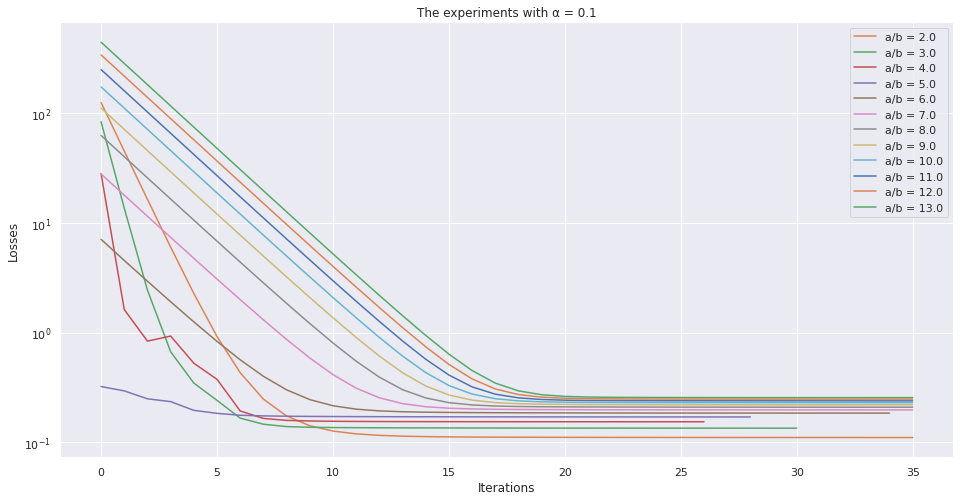

In [560]:
# The experimet with new_loss and new_grad

# TEST 1.1 a1/b1 > 1

alpha = 0.1

colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

b = 1
for a in range(2,14,1):
    c = a/b 
    weights, losses = gradDescent_new(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2)
    ax.plot(range(len(losses)), losses, colors[a-1], label='a/b = {}'.format(c))


plt.title('The experiments with α = {}'.format(alpha))
plt.ylabel('Losses')   
plt.xlabel('Iterations')

ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

### Conclusion:

- With an increase in the value of a / b, the number of iterations changes, the loss function values increses.
- Values a/b = 2 gives fewer iterations and good computational accuracy.

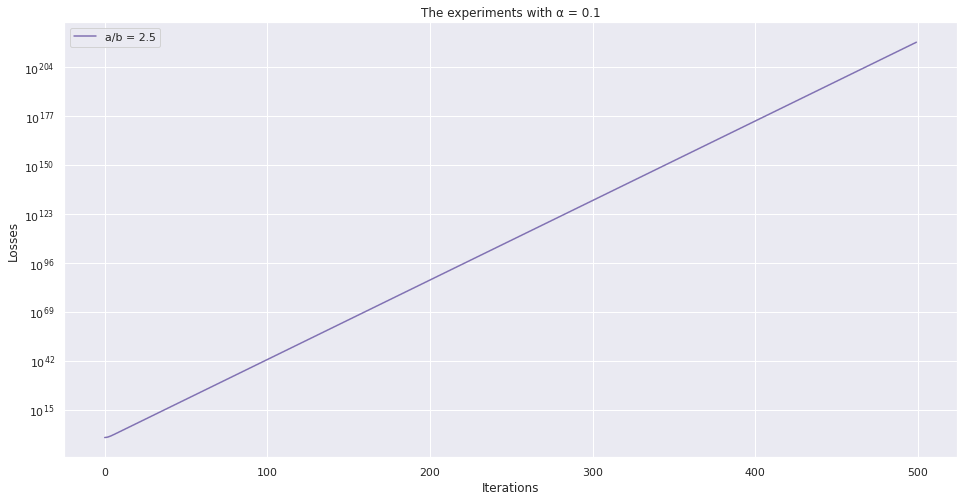

In [561]:
# The experimet with new_loss and new_grad

# TEST 1.2 a1/b1 > 1

alpha = 0.1

colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

b = 2
a = 5
c = a/b 
weights, losses = gradDescent_new(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2)
ax.plot(range(len(losses)), losses, colors[a-1], label='a/b = {}'.format(c))


plt.title('The experiments with α = {}'.format(alpha))
plt.ylabel('Losses')   
plt.xlabel('Iterations')

ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

### Conclusion:

In Test 1.2, the gradient method does not converge.

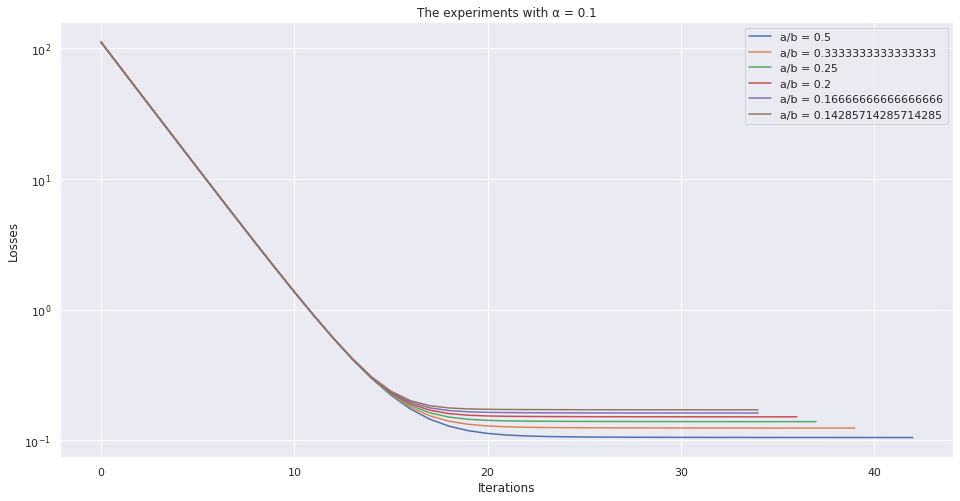

In [562]:
# The experimet with new_loss and new_grad

# TEST 1.3 a2/b2 < 1

alpha = 0.1

colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

a = 1
for b in range(2,8,1):
    c = a/b 
    weights, losses = gradDescent_new(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2)
    ax.plot(range(len(losses)), losses, colors[b-2], label='a/b = {}'.format(c))


plt.title('The experiments with α = {}'.format(alpha))
plt.ylabel('Losses')   
plt.xlabel('Iterations')

ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

### Conclusion:

- With an decrease in the value of a / b, the number of iterations changes, the loss function values increses.
- The best results are obtained when using a = 1, b = 2.

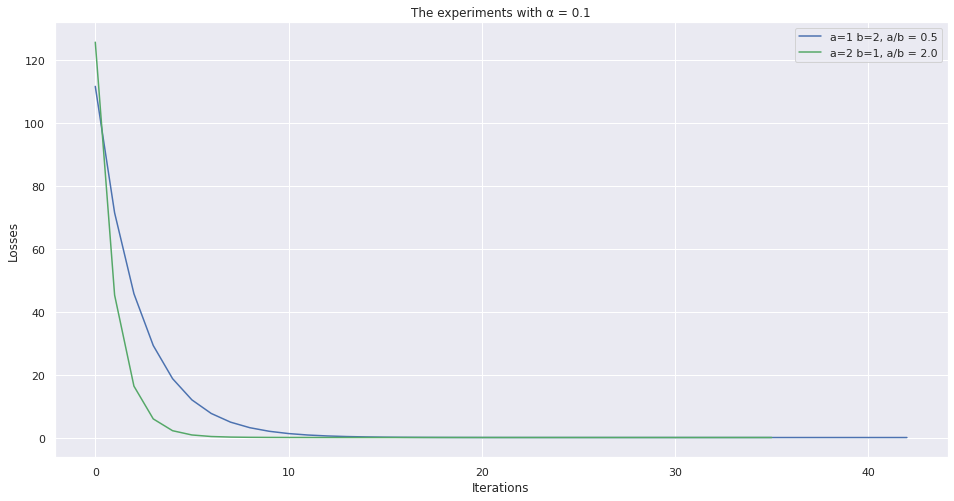

In [563]:
# Compare the output

alpha = 0.1

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

a = 1
b = 2
c = a/b  # < 1
weights1, losses1 = gradDescent_new(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2)
ax.plot(range(len(losses1)), losses1, 'b-', label='a=1 b=2, a/b = {}'.format(c))

a = 2
b = 1
c = a/b # > 1
weights2, losses2 = gradDescent_new(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2)
ax.plot(range(len(losses2)), losses2, 'g-', label='a=2 b=1, a/b = {}'.format(c))

plt.title('The experiments with α = {}'.format(alpha))
plt.ylabel('Losses')   
plt.xlabel('Iterations')

#ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

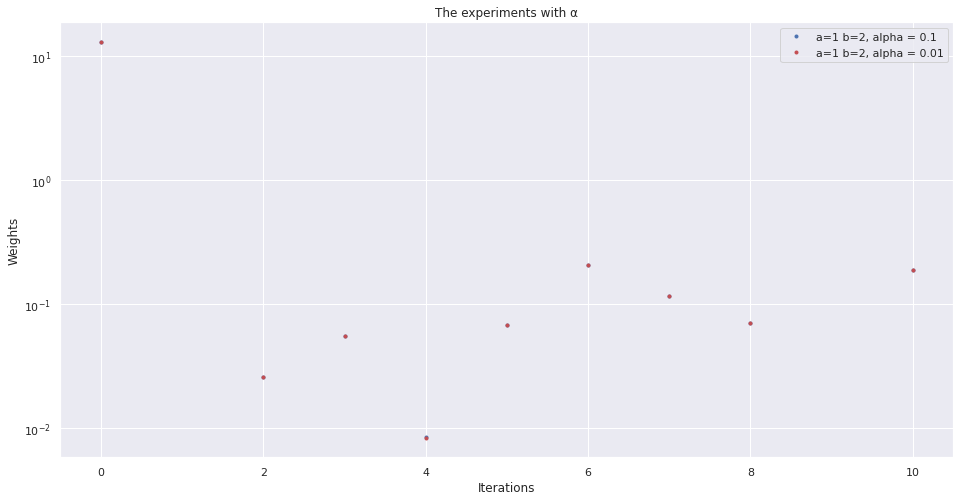

In [567]:
# Compare the weights



fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

alpha = 0.1
a = 1
b = 2


weights1, losses1 = gradDescent_new(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2)
ax.plot(range(len(weights1[-1])), weights1[-1], 'b.', label='a=1 b=2, alpha = {}'.format(alpha))

alpha = 0.01
a = 1
b = 2


weights2, losses2 = gradDescent_new(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2)
ax.plot(range(len(weights2[-1])), weights2[-1], 'r.', label='a=1 b=2, alpha = {}'.format(alpha))

plt.title('The experiments with α')
plt.ylabel('Weights')   
plt.xlabel('Iterations')

ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

In [568]:
weights1[-1]

array([ 1.29755887e+01, -1.29875237e-02,  2.56834842e-02,  5.52403016e-02,
        8.46415634e-03,  6.73255819e-02,  2.07039981e-01,  1.16566254e-01,
        7.05016801e-02, -1.82514300e-02,  1.89216583e-01])

In [569]:
weights2[-1]

array([ 1.29754618e+01, -1.29763931e-02,  2.57044220e-02,  5.52399354e-02,
        8.36738739e-03,  6.73181010e-02,  2.07078577e-01,  1.16602910e-01,
        7.04319576e-02, -1.83121235e-02,  1.89215018e-01])

### Conclusion:

Values of the weights are close enough.

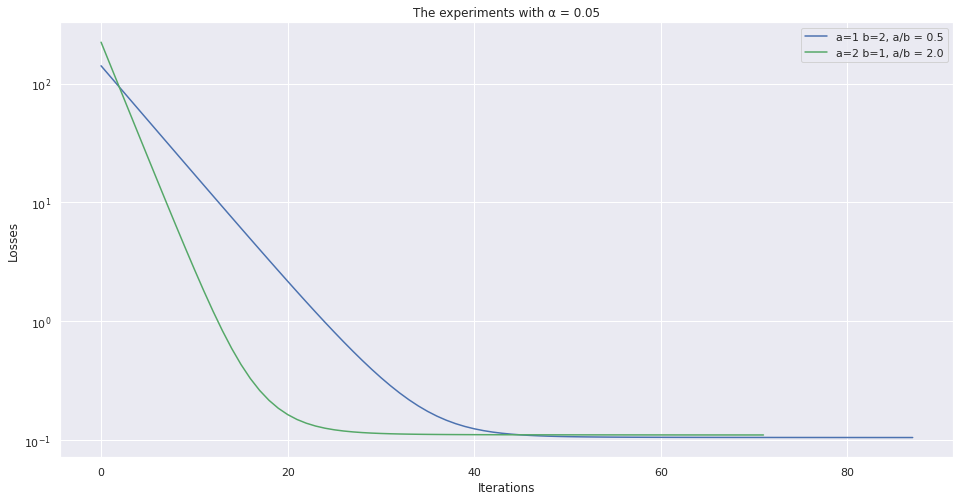

In [570]:
# Compare the output + different alpha

alpha = 0.05

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

a = 1
b = 2
c = a/b  # < 1
weights1, losses1 = gradDescent_new(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2)
ax.plot(range(len(losses1)), losses1, 'b-', label='a=1 b=2, a/b = {}'.format(c))

a = 2
b = 1
c = a/b # > 1
weights2, losses2 = gradDescent_new(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2)
ax.plot(range(len(losses2)), losses2, 'g-', label='a=2 b=1, a/b = {}'.format(c))

plt.title('The experiments with α = {}'.format(alpha))
plt.ylabel('Losses')   
plt.xlabel('Iterations')

ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

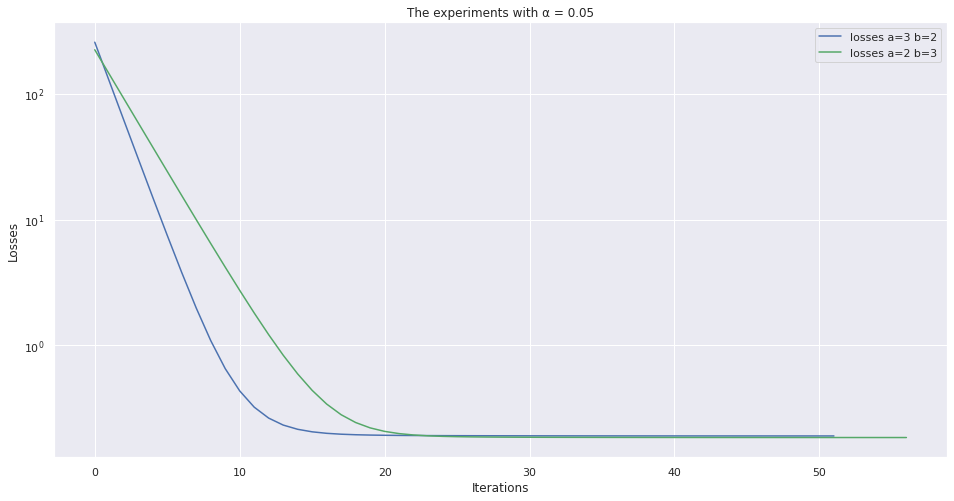

In [571]:
# Compare the output + different alpha

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

alpha = 0.05

a = 3
b = 2
# 3/2 > 1
weights3, losses3 = gradDescent_new(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2)
ax.plot(range(len(losses3)), losses3,'b-', label='losses a=3 b=2')

a = 2
b = 3
# 2/3 < 1
weights4, losses4 = gradDescent_new(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2)
ax.plot(range(len(losses4)), losses4,'g-', label='losses a=2 b=3')

plt.title('The experiments with α = {}'.format(alpha))
plt.ylabel('Losses')   
plt.xlabel('Iterations')

ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

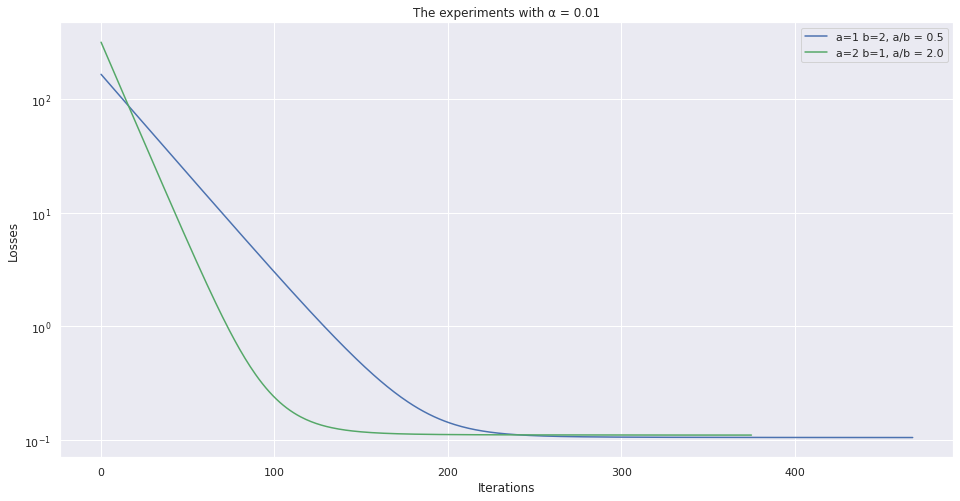

In [390]:
# Compare the output + different alpha

alpha = 0.01

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

a = 1
b = 2
c = a/b  # < 1
weights1, losses1 = gradDescent_new(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2)
ax.plot(range(len(losses1)), losses1, 'b-', label='a=1 b=2, a/b = {}'.format(c))

a = 2
b = 1
c = a/b # > 1
weights2, losses2 = gradDescent_new(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2)
ax.plot(range(len(losses2)), losses2, 'g-', label='a=2 b=1, a/b = {}'.format(c))

plt.title('The experiments with α = {}'.format(alpha))
plt.ylabel('Losses')   
plt.xlabel('Iterations')

ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

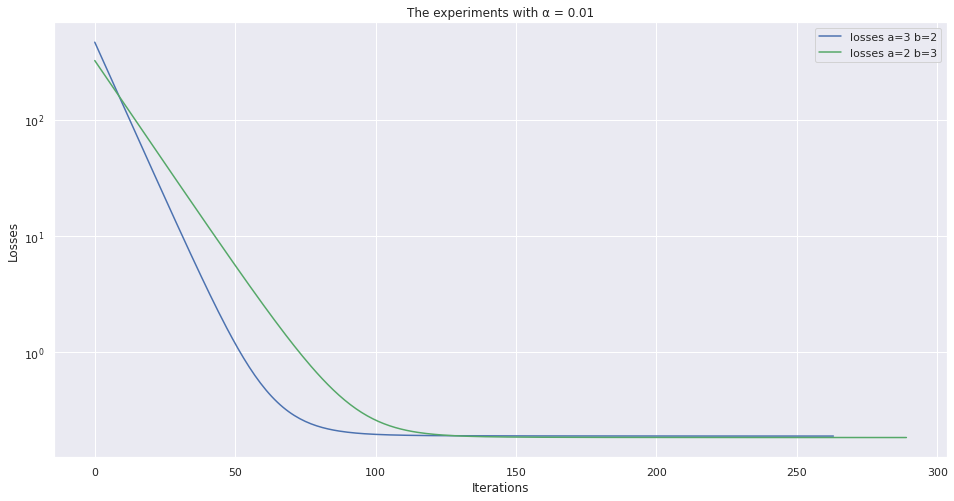

In [572]:
# Compare the output + different alpha

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

alpha = 0.01

a = 3
b = 2
# 3/2 > 1
weights3, losses3 = gradDescent_new(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2)
ax.plot(range(len(losses3)), losses3,'b-', label='losses a=3 b=2')

a = 2
b = 3
# 2/3 < 1
weights4, losses4 = gradDescent_new(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2)
ax.plot(range(len(losses4)), losses4,'g-', label='losses a=2 b=3')

plt.title('The experiments with α = {}'.format(alpha))
plt.ylabel('Losses')   
plt.xlabel('Iterations')

ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

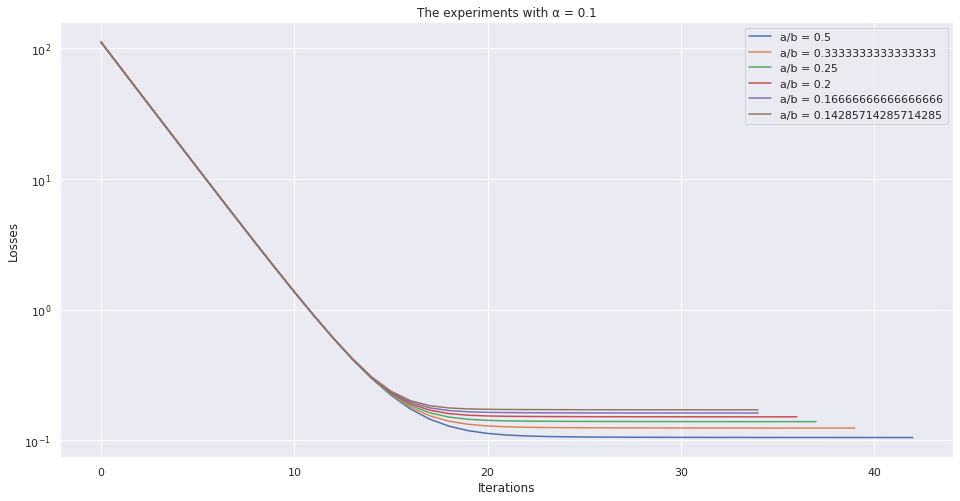

In [573]:
# TEST a = 1

alpha = 0.1

colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

a = 1
for b in range(2,8,1):
    c = a/b 
    weights, losses = gradDescent_new(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2)
    ax.plot(range(len(losses)), losses, colors[b-2], label='a/b = {}'.format(c))


plt.title('The experiments with α = {}'.format(alpha))
plt.ylabel('Losses')   
plt.xlabel('Iterations')

ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

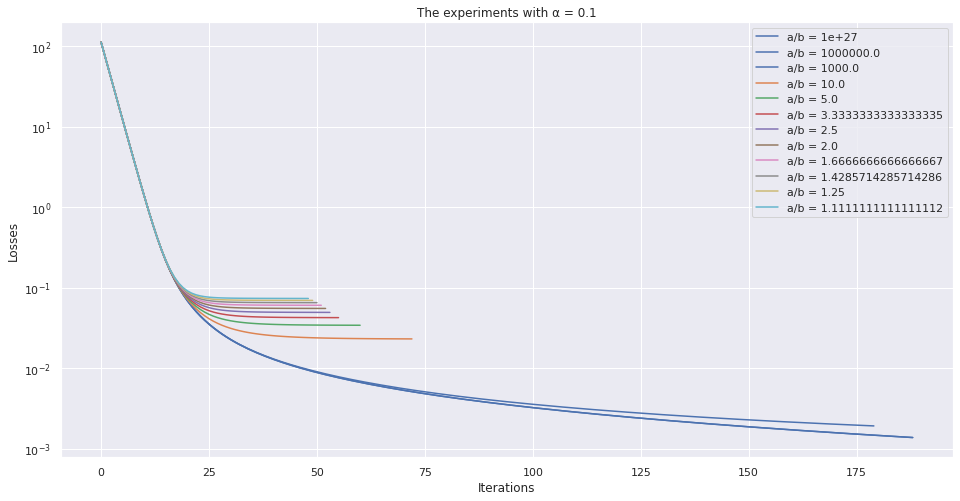

In [574]:
# TEST 2 a = 1

alpha = 0.1

colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']

fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

a = 1

b = [0.000000000000000000000000001, 0.000001, 0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in b:
    c = a/i 
    weights, losses = gradDescent_new(w_init, alpha, X, y, a, i, maxiter=500, eps=1e-2)
    ax.plot(range(len(losses)), losses, colors[int(i*10)], label='a/b = {}'.format(c))


plt.title('The experiments with α = {}'.format(alpha))
plt.ylabel('Losses')   
plt.xlabel('Iterations')

ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

In [580]:
y_true = datY
X_n = norm(X)
ones = np.ones([N, 1])
X_n = np.concatenate([ones, X_n], axis=1)


alpha = 0.1

a = 1
b = 1
weights1, losses1 = gradDescent_new(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2)
y_pred1 = np.dot(X_n,  weights1[-1])

a1 = 1
b1 = 2
weights2, losses2 = gradDescent_new(w_init, alpha, X, y, a1, b1, maxiter=500, eps=1e-2)
y_pred2 = np.dot(X_n,  weights2[-1])


a2 = 1
b2 = 3
weights3, losses3 = gradDescent_new(w_init, alpha, X, y, a2, b2, maxiter=500, eps=1e-2)
y_pred3 = np.dot(X_n,  weights3[-1])

a3 = 1
b3 = 4
weights4, losses4 = gradDescent_new(w_init, alpha, X, y, a3, b3, maxiter=500, eps=1e-2)
y_pred4 = np.dot(X_n,  weights4[-1])

a4 = 1
b4 = 5
weights5, losses5 = gradDescent_new(w_init, alpha, X, y, a4, b4, maxiter=500, eps=1e-2)
y_pred5 = np.dot(X_n,  weights5[-1])

In [581]:
print('a = 1, b = 1, y_mean =', round(y_pred1.mean(),4))

print('b =', b1, 'a/b =', round(a1/b1, 2), 'y_mean =', round(y_pred2.mean(),4), '-->', round(y_pred2.mean()/y_pred1.mean()*100,4))
print('b =', b2, 'a/b =', round(a2/b2, 2), 'y_mean =', round(y_pred3.mean(),4), '-->', round(y_pred3.mean()/y_pred1.mean()*100,4))
print('b =', b3, 'a/b =', round(a3/b3, 2), 'y_mean =', round(y_pred4.mean(),4), '-->', round(y_pred4.mean()/y_pred1.mean()*100,4))
print('b =', b4, 'a/b =', round(a4/b4, 2), 'y_mean =', round(y_pred5.mean(),4), '-->', round(y_pred5.mean()/y_pred1.mean()*100,4))

a = 1, b = 1, y_mean = 13.0487
b = 2 a/b = 0.5 y_mean = 12.9756 --> 99.44
b = 3 a/b = 0.33 y_mean = 12.9338 --> 99.1196
b = 4 a/b = 0.25 y_mean = 12.9046 --> 98.8961
b = 5 a/b = 0.2 y_mean = 12.8823 --> 98.7251


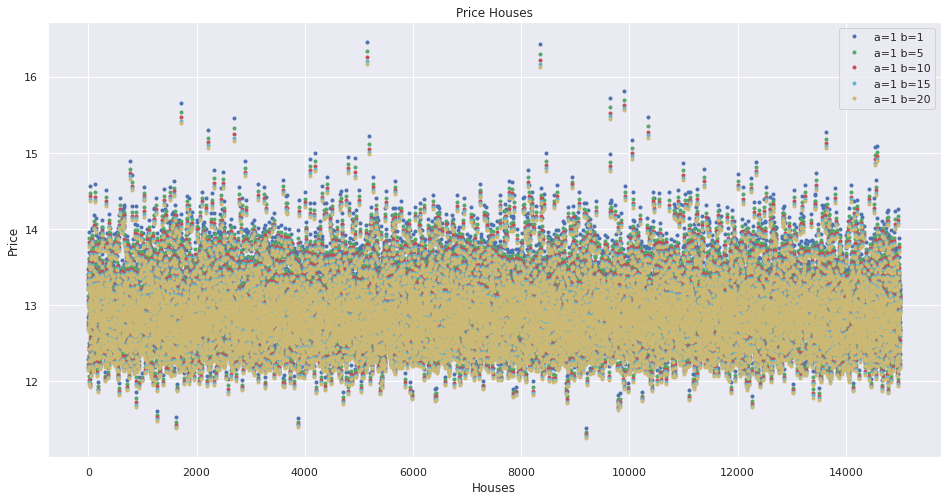

In [582]:
fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

ax.plot(y_pred1,'b.', label='a=1 b=1')

ax.plot(y_pred2,'g.', label='a=1 b=5')

ax.plot(y_pred3,'r.', label='a=1 b=10')

ax.plot(y_pred4,'c.', label='a=1 b=15')

ax.plot(y_pred5,'y.', label='a=1 b=20')

plt.title('Price Houses')
plt.ylabel('Price')   
plt.xlabel('Houses')

#ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

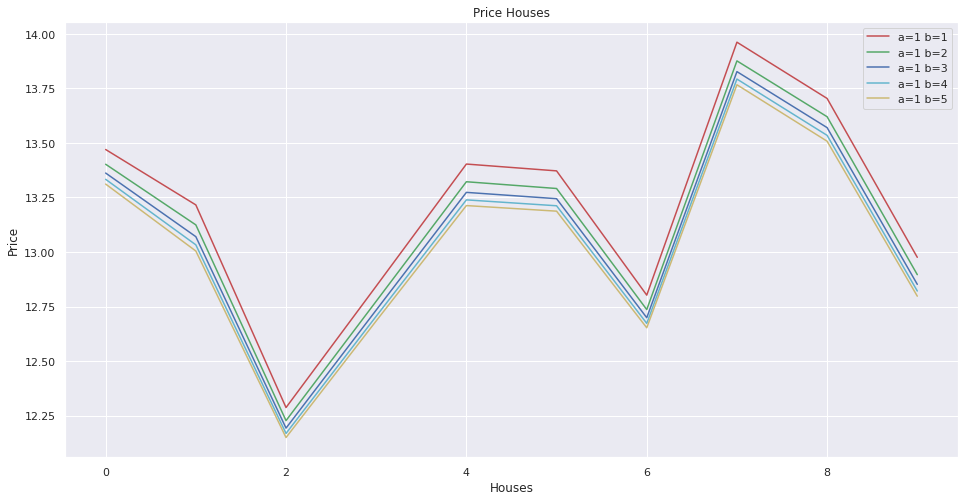

In [585]:
fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

ax.plot(y_pred1[0:10],'r-', label='a=1 b=1')

ax.plot(y_pred2[0:10],'g-', label='a=1 b=2')

ax.plot(y_pred3[0:10],'b-', label='a=1 b=3')

ax.plot(y_pred4[0:10],'c-', label='a=1 b=4')

ax.plot(y_pred5[0:10],'y-', label='a=1 b=5')

plt.title('Price Houses')
plt.ylabel('Price')   
plt.xlabel('Houses')

#ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

In [590]:
y_true = datY
X_n = norm(X)
ones = np.ones([N, 1])
X_n = np.concatenate([ones, X_n], axis=1)


alpha = 0.1

a = 1
b = 1
weights1, losses1 = gradDescent_new(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2)
y_pred1 = np.dot(X_n,  weights1[-1])

a1 = 1
b1 = 0.9
weights2, losses2 = gradDescent_new(w_init, alpha, X, y, a1, b1, maxiter=500, eps=1e-2)
y_pred2 = np.dot(X_n,  weights2[-1])


a2 = 1
b2 = 0.7
weights3, losses3 = gradDescent_new(w_init, alpha, X, y, a2, b2, maxiter=500, eps=1e-2)
y_pred3 = np.dot(X_n,  weights3[-1])

a3 = 1
b3 = 0.5
weights4, losses4 = gradDescent_new(w_init, alpha, X, y, a3, b3, maxiter=500, eps=1e-2)
y_pred4 = np.dot(X_n,  weights4[-1])

a4 = 1
b4 = 0.3
weights5, losses5 = gradDescent_new(w_init, alpha, X, y, a4, b4, maxiter=500, eps=1e-2)
y_pred5 = np.dot(X_n,  weights5[-1])

In [592]:
print('a = 1, b = 1, y_mean =', round(y_pred1.mean(),4))

print('b =', b1, 'a/b =', round(a1/b1, 2), 'y_mean =', round(y_pred2.mean(),4), '-->', round(y_pred2.mean()/y_pred1.mean()*100,4))
print('b =', b2, 'a/b =', round(a2/b2, 2), 'y_mean =', round(y_pred3.mean(),4), '-->', round(y_pred3.mean()/y_pred1.mean()*100,4))
print('b =', b3, 'a/b =', round(a3/b3, 2), 'y_mean =', round(y_pred4.mean(),4), '-->', round(y_pred4.mean()/y_pred1.mean()*100,4))
print('b =', b4, 'a/b =', round(a4/b4, 2), 'y_mean =', round(y_pred5.mean(),4), '-->', round(y_pred5.mean()/y_pred1.mean()*100,4))

a = 1, b = 1, y_mean = 13.0487
b = 0.9 a/b = 1.11 y_mean = 13.0599 --> 100.0861
b = 0.7 a/b = 1.43 y_mean = 13.0867 --> 100.2917
b = 0.5 a/b = 2.0 y_mean = 13.1225 --> 100.5656
b = 0.3 a/b = 3.33 y_mean = 13.1756 --> 100.9728


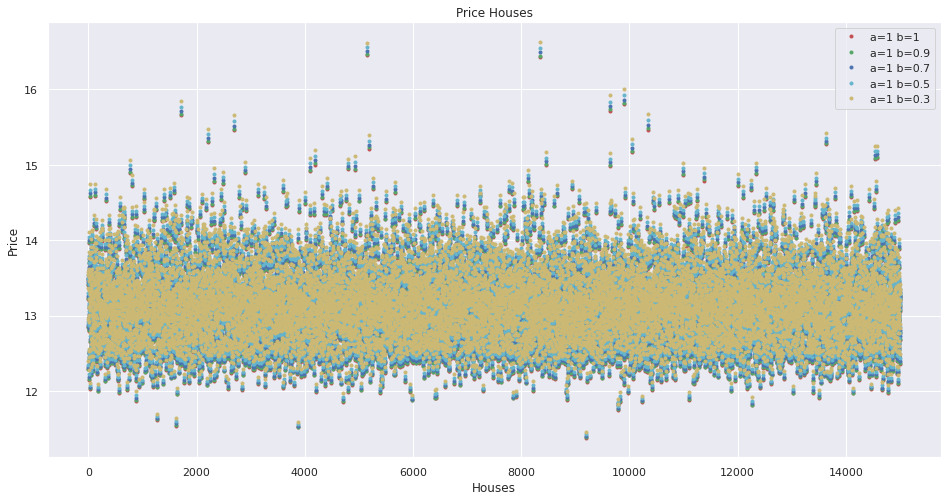

In [593]:
fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

ax.plot(y_pred1,'r.', label='a=1 b=1')

ax.plot(y_pred2,'g.', label='a=1 b=0.9')

ax.plot(y_pred3,'b.', label='a=1 b=0.7')

ax.plot(y_pred4,'c.', label='a=1 b=0.5')

ax.plot(y_pred5,'y.', label='a=1 b=0.3')

plt.title('Price Houses')
plt.ylabel('Price')   
plt.xlabel('Houses')

#ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

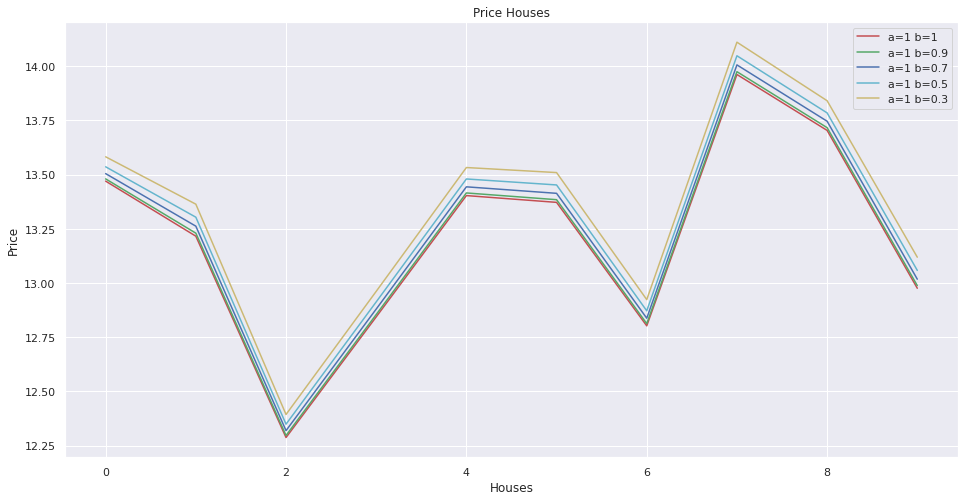

In [596]:
fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

ax.plot(y_pred1[0:10],'r-', label='a=1 b=1')

ax.plot(y_pred2[0:10],'g-', label='a=1 b=0.9')

ax.plot(y_pred3[0:10],'b-', label='a=1 b=0.7')

ax.plot(y_pred4[0:10],'c-', label='a=1 b=0.5')

ax.plot(y_pred5[0:10],'y-', label='a=1 b=0.3')

plt.title('Price Houses')
plt.ylabel('Price')   
plt.xlabel('Houses')

#ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

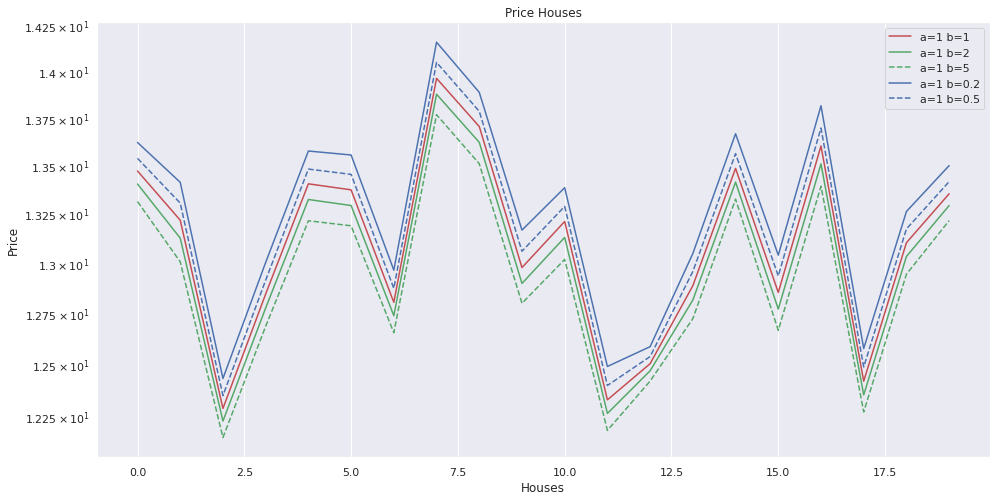

In [602]:
y_true = datY
X_n = norm(X)
ones = np.ones([N, 1])
X_n = np.concatenate([ones, X_n], axis=1)


alpha = 0.1

a = 1
b = 1
weights, losses = gradDescent_new(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2)
y_pred = np.dot(X_n,  weights[-1])

a1 = 1
b1 = 2
weights1, losses1 = gradDescent_new(w_init, alpha, X, y, a1, b1, maxiter=500, eps=1e-2)
y_pred1 = np.dot(X_n,  weights1[-1])


a2 = 1
b2 = 5
weights2, losses2 = gradDescent_new(w_init, alpha, X, y, a2, b2, maxiter=500, eps=1e-2)
y_pred2 = np.dot(X_n,  weights2[-1])

a3 = 1
b3 = 0.2
weights3, losses3 = gradDescent_new(w_init, alpha, X, y, a3, b3, maxiter=500, eps=1e-2)
y_pred3 = np.dot(X_n,  weights3[-1])


a4 = 1
b4 = 0.5
weights4, losses4 = gradDescent_new(w_init, alpha, X, y, a4, b4, maxiter=500, eps=1e-2)
y_pred4 = np.dot(X_n,  weights4[-1])


fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(1, 1, 1)

ax.plot(y_pred[0:20],'r-', label='a=1 b=1')

ax.plot(y_pred1[0:20],'g-', label='a=1 b=2')
ax.plot(y_pred2[0:20],'g--', label='a=1 b=5')

ax.plot(y_pred3[0:20],'b-', label='a=1 b=0.2')
ax.plot(y_pred4[0:20],'b--', label='a=1 b=0.5')


plt.title('Price Houses')
plt.ylabel('Price')   
plt.xlabel('Houses')

ax.set_yscale('log')
#ax.set_xscale('log')
plt.legend(loc='best')
plt.show()

1. According to the regression equation $ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $ thhe weights remain the same when we get stuck in a optimal state (in the case of using the optimal model with different input data (alpha, w_init)). w_i is coefficients of the regression line, it is the slope (tangent of angle) of the line that connects the i-th point to the average of all points, that is they should be close enough with approximation. w_0 can be different that w0 because it is responsible for a function  bias.


2. **Changes to the model parameters depend on the goal**. **In the case of an increase in the parameter a**, we focus the calculations on **the underestimation of the value of the house**. **In the case of an increase in parameter b**, we, on the contrary, focus on **the overestimation of the value of the house**.
Depending on our request, we can build an appropriate forecast. For example, if, due to the market situation, we expect a decline in house prices, then it is necessary to make adjustments for parameter a. If, on the contrary, we want to show that in the near future the investments made in the house will justify themselves, then it is necessary to make adjustments to parameter b.




**If we fix the parameter a = 1, then**

--- First case

**a/b > 1** then 1/b > 1 we get **b < 1**


**a = 1, b = 1**, y_mean = **13.0487**

**b = 0.9** a/b = 1.11 y_mean = **13.0599** --> 100.0861

**b = 0.7** a/b = 1.43 y_mean = **13.0867** --> 100.2917

**b = 0.5** a/b = 2.0 y_mean = **13.1225** --> 100.5656

**b = 0.3** a/b = 3.33 y_mean = **13.1756** --> 100.9728


**As parameter b decreases, the predicted price increases.**

--- Second  case

**a/b < 1** then 1/b < 1 we get **b > 1**


**a = 1, b = 1**, y_mean = **13.0487**

**b = 2** a/b = 0.5 y_mean = **12.9756** --> 99.44

**b = 3** a/b = 0.33 y_mean = **12.9338* --> 99.1196

**b = 4** a/b = 0.25 y_mean = **12.9046** --> 98.8961

**b = 5** a/b = 0.2 y_mean = **12.8823** --> 98.7251

**With an increase in parameter b, the predicted price decreases.**
